<a href="https://colab.research.google.com/github/data-better/RBOK/blob/main/RBOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. R의 소개

* 무료로 사용하는 데이터분석 소프트웨어 : R, Python
* R의 설치 : https://r-project.org
* R 개발환경 : Rstudio / Python 개발환경 : anaconda 
* 클라우드 기반 쥬피터 노트북 : 구글 Colab



## 2. 구글 Colab

* 구글 id가 있어야 이용 가능, 구글 drive 이용
* 텍스트와 코드로 구성 
  - 텍스트 작성 : 마크다운
  - 코드 수행 : Crtl+Enter, Shift+Enter, Alt+Enter 
* 크롬 브라우저에서 Python과 R을 실행 : R은 임시
  - 설치 필요하지 않음
  - GPU 무료 액세스
* Pyhon 기반 : https://colab.research.google.com/
* R : https://colab.research.google.com/notebook#create=true&language=r

## 3. R의 특징
  * Colab 환경 검토 : R.Version()
  * 설치된 library : library()
  * 설치된 data    : data()


In [18]:
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "0.3"

$year
[1] "2020"

$month
[1] "10"

$day
[1] "10"

$`svn rev`
[1] "79318"

$language
[1] "R"

$version.string
[1] "R version 4.0.3 (2020-10-10)"

$nickname
[1] "Bunny-Wunnies Freak Out"

In [19]:
library()

In [20]:
help(package='base')

In [21]:
data()

In [22]:
?Syntax

In [23]:
options()

$add.smooth
[1] TRUE

$bitmapType
[1] "cairo"

$browser
[1] "xdg-open"

$browserNLdisabled
[1] FALSE

$callr.condition_handler_cli_message
function (msg) 
{
    custom_handler <- getOption("cli.default_handler")
    if (is.function(custom_handler)) {
        custom_handler(msg)
    }
    else {
        cli_server_default(msg)
    }
}
<bytecode: 0x558b74880c80>
<environment: namespace:cli>

$CBoundsCheck
[1] FALSE

$check.bounds
[1] FALSE

$citation.bibtex.max
[1] 1

$continue
[1] "+ "

$contrasts
        unordered           ordered 
"contr.treatment"      "contr.poly" 

$cpp11_preserve_env
<environment: 0x558b719c7968>

$crayon.enabled
[1] TRUE

$defaultPackages
[1] "datasets"  "utils"     "grDevices" "graphics"  "stats"     "methods"  

$demo.ask
[1] "default"

$deparse.cutoff
[1] 60

$device
function (filename = null_filename, ...) 
ok_device(filename, ...)
<bytecode: 0x558b6de9d690>
<environment: 0x558b6de9d230>

$device.ask.default
[1] FALSE

$digits
[1] 7

$dplyr.show_progress
[1]

## 4. R 기초

In [24]:
# 계산과 변수 지정

1+2
a = 10
b <- 2
a+b

[1] 3

[1] 12

In [25]:
# 데이터 형태
a1 = c(1,2,5)
print(a1)
b1 <- c(1,2, 'aa', TRUE)
print(b1)
c1 <- matrix(1:12, 4,3)
print(c1)

[1] 1 2 5
[1] "1"    "2"    "aa"   "TRUE"
     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12


## 5. 데이터 읽어오기

In [26]:
library(tidyverse)
options(warn=-1,repr.plot.width = 10, repr.plot.height = 6)

In [27]:
dataq = read_csv("https://raw.githubusercontent.com/data-better/RBOK/main/data/BOK_DATA_Q.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  date = col_character(),
  cp_sa = col_double(),
  gdp_sa = col_double(),
  cp = col_double(),
  gdp = col_double(),
  ipi = col_double(),
  ipi_sa = col_double(),
  conpi = col_double(),
  conpi_sa = col_double(),
  sbi = col_double(),
  sbi_sa = col_double(),
  pubpi = col_double(),
  pubpi_sa = col_double(),
  cpi = col_double(),
  cpi_core = col_double(),
  ur_sa = col_double(),
  ur = col_double()
)




In [28]:
dataq = dataq %>% 
  mutate( gdp_sa_p = (gdp_sa - lag(gdp_sa)) / lag(gdp_sa) * 100,
          cp_sa_p  = (cp_sa - lag(cp_sa)) / lag(cp_sa) * 100,
          ipi_sa_p  = (ipi_sa - lag(ipi_sa)) / lag(ipi_sa) * 100,
          sbi_sa_p  = (sbi_sa - lag(sbi_sa)) / lag(sbi_sa) * 100,
          gdp_p    = (gdp    - lag(gdp, 4)) / lag(gdp, 4) * 100,
          cpi_p    = (gdp    - lag(cpi, 4)) / lag(cpi, 4) * 100
          )
head(dataq, 2)

date,cp_sa,gdp_sa,cp,gdp,ipi,ipi_sa,conpi,conpi_sa,sbi,⋯,cpi,cpi_core,ur_sa,ur,gdp_sa_p,cp_sa_p,ipi_sa_p,sbi_sa_p,gdp_p,cpi_p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1985<b3><e2> 1<bf><f9>,42683.1,66553.4,42258.9,60797.6,NA,NA,NA,NA,NA,⋯,30.78,32.87,NA,NA,NA,NA,NA,NA,NA,NA
1985<b3><e2> 4<bf><f9>,43705.5,68156.6,42763.8,67581.3,NA,NA,NA,NA,NA,⋯,31.06,33.17,NA,NA,2.408893,2.395327,NA,NA,NA,NA


In [29]:
# dataq_ts = ts(dataq, start=1985, frequency=4)
dataq_ts = dataq %>% ts(start=1985, frequency=4)
head(dataq_ts)

date,cp_sa,gdp_sa,cp,gdp,ipi,ipi_sa,conpi,conpi_sa,sbi,⋯,cpi,cpi_core,ur_sa,ur,gdp_sa_p,cp_sa_p,ipi_sa_p,sbi_sa_p,gdp_p,cpi_p
2,42683.1,66553.4,42258.9,60797.6,NA,NA,NA,NA,NA,⋯,30.78,32.87,NA,NA,NA,NA,NA,NA,NA,NA
3,43705.5,68156.6,42763.8,67581.3,NA,NA,NA,NA,NA,⋯,31.06,33.17,NA,NA,2.408893,2.395327,NA,NA,NA,NA
4,44810.9,68932.0,43786.4,70487.5,NA,NA,NA,NA,NA,⋯,31.31,33.52,NA,NA,1.137674,2.529201,NA,NA,NA,NA
1,45531.6,71033.5,47922.0,75809.0,NA,NA,NA,NA,NA,⋯,31.47,33.61,NA,NA,3.048657,1.608314,NA,NA,NA,NA
6,46475.9,72401.2,45987.1,66339.3,NA,NA,NA,NA,NA,⋯,31.89,33.98,NA,NA,1.925430,2.073944,NA,NA,9.114998,215427.3
7,47668.1,75222.8,46774.0,74470.3,NA,NA,NA,NA,NA,⋯,32.07,34.43,NA,NA,3.897173,2.565200,NA,NA,10.193648,239662.7


## 6. 데이터 시각화

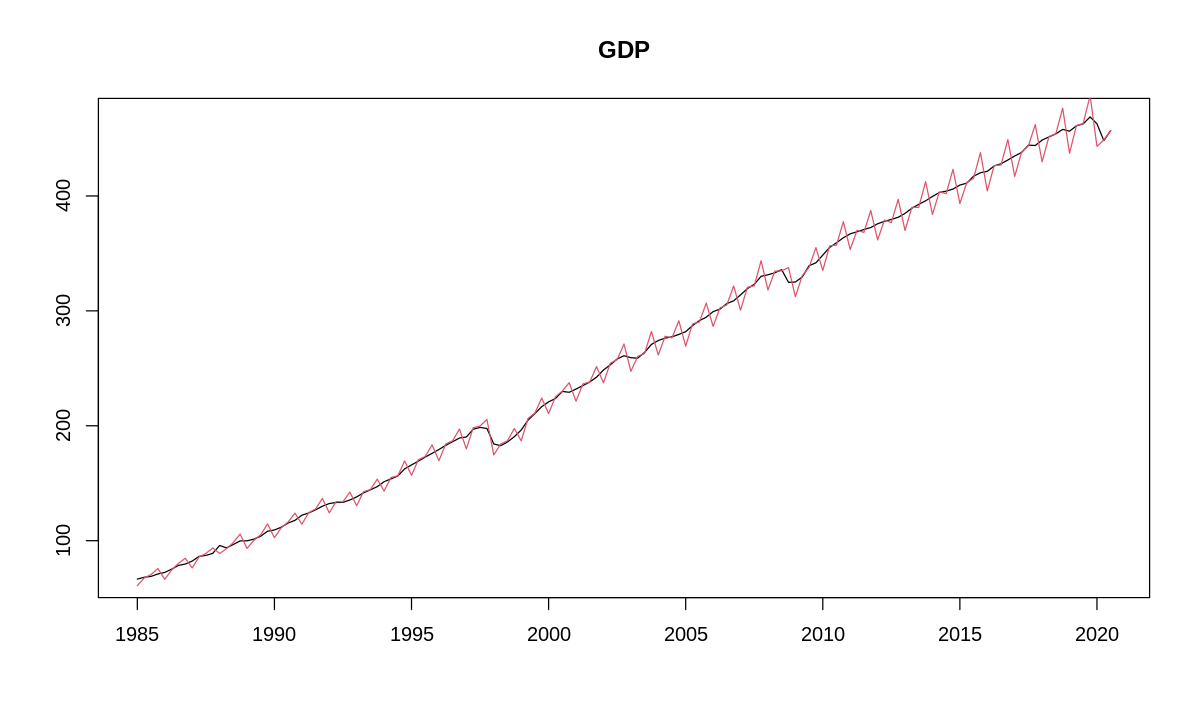

In [30]:
plot(dataq_ts[,3]/1000, xlab="", ylab="", main="GDP")
 lines(dataq_ts[,5]/1000, col=2)

In [31]:
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



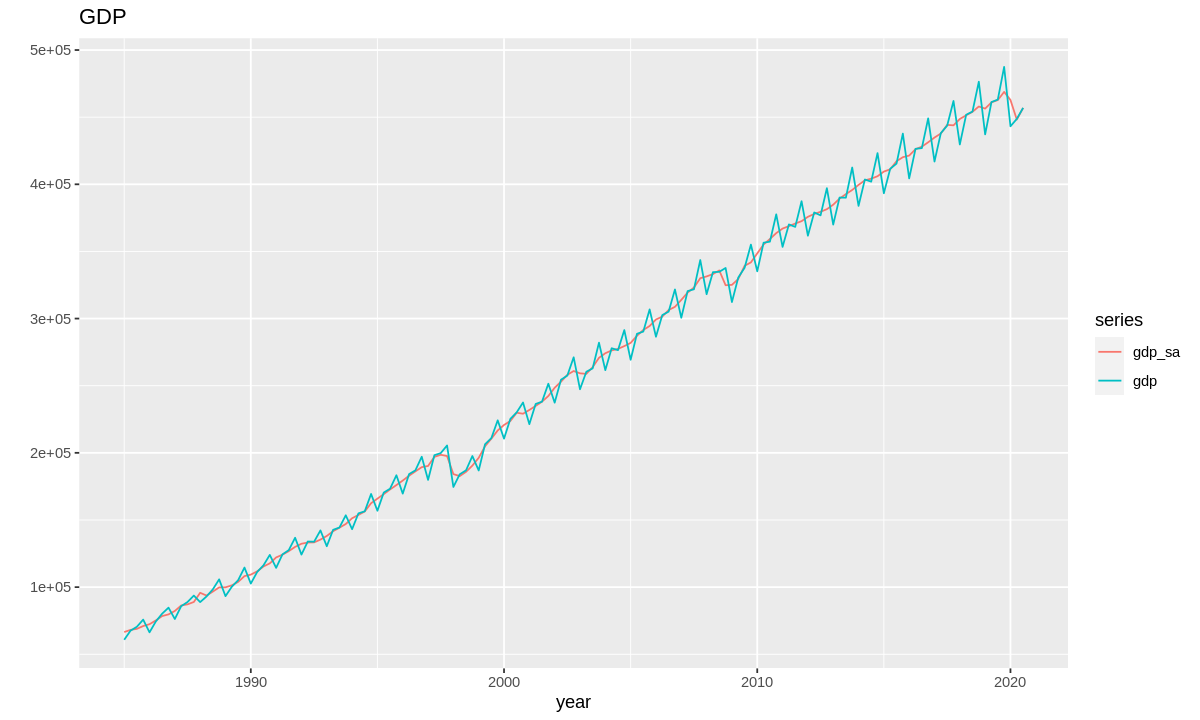

In [32]:
autoplot(dataq_ts[, c(3,5)])+
  ggtitle("GDP") +
  ylab("") +
  xlab("year")

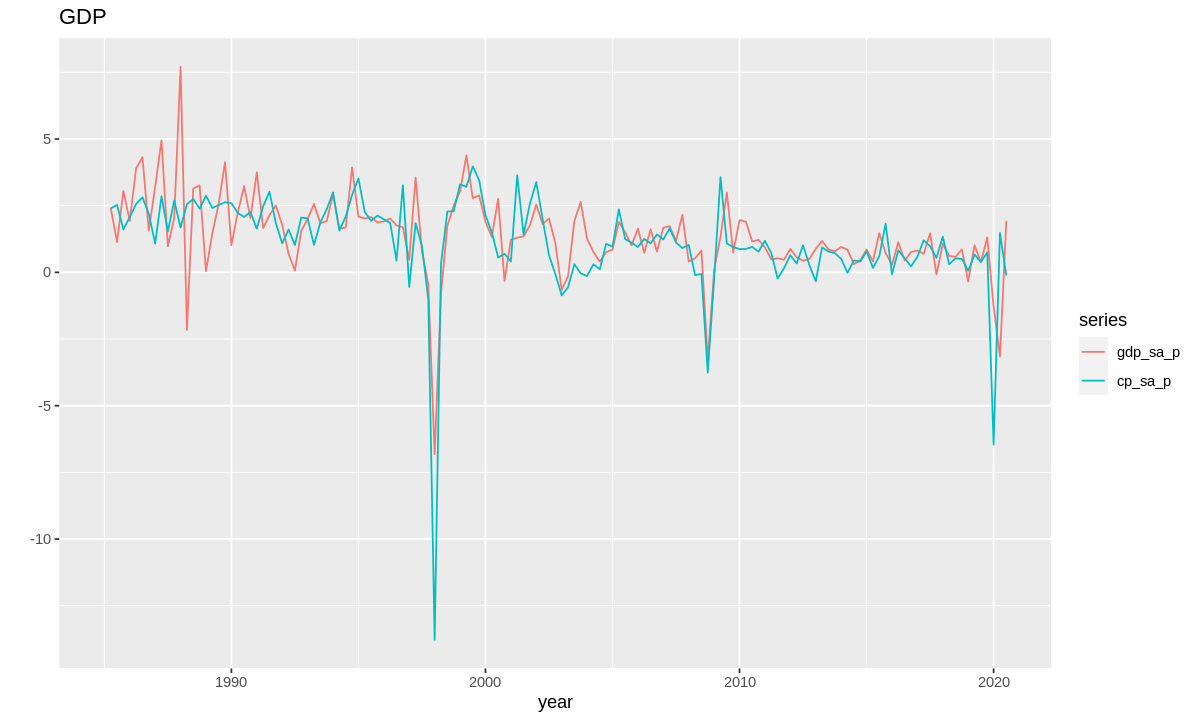

In [33]:
autoplot(dataq_ts[, c(18,19)])+
  ggtitle("GDP") +
  ylab("") +
  xlab("year")

## 7. 시계열의 분해

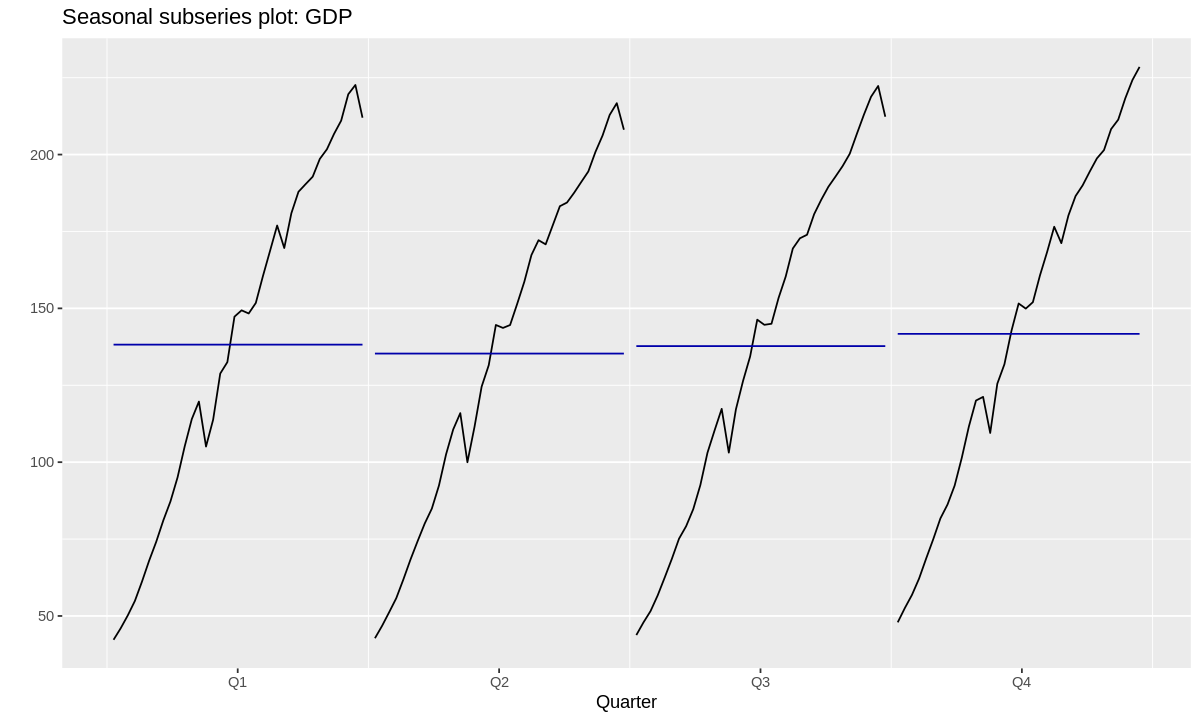

In [34]:
# GDP의 계절성
ggsubseriesplot(dataq_ts[,4]/1000) +
  ylab("") +
  ggtitle("Seasonal subseries plot: GDP")

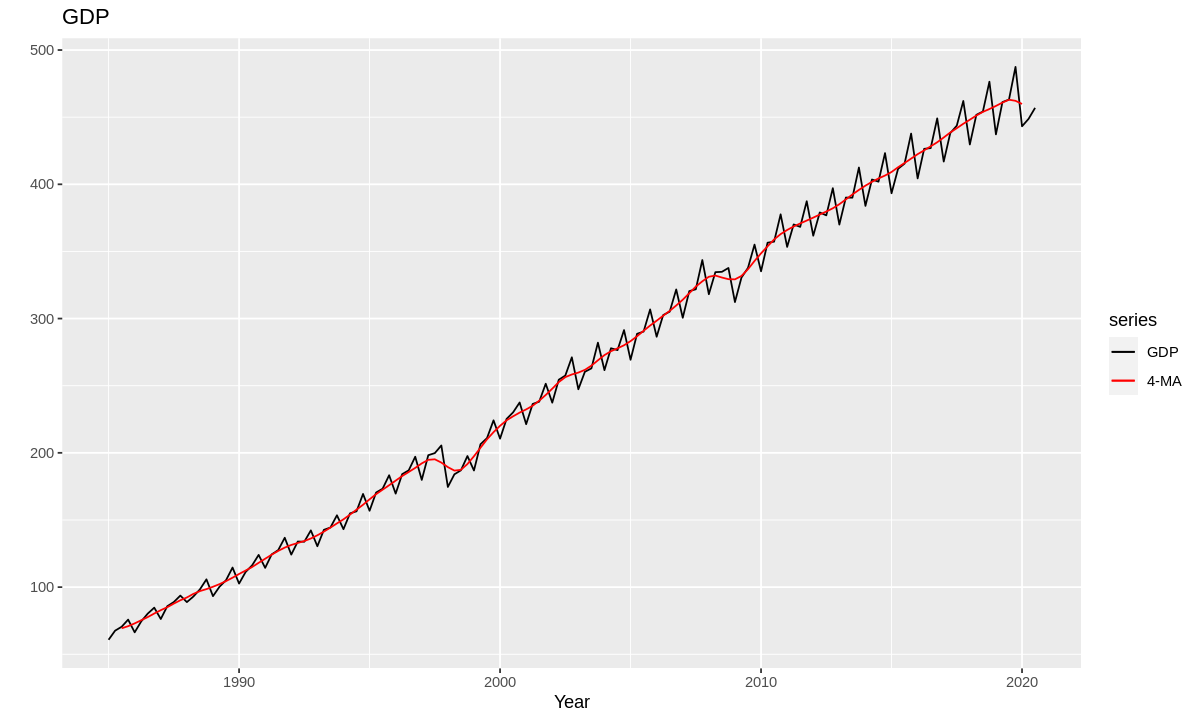

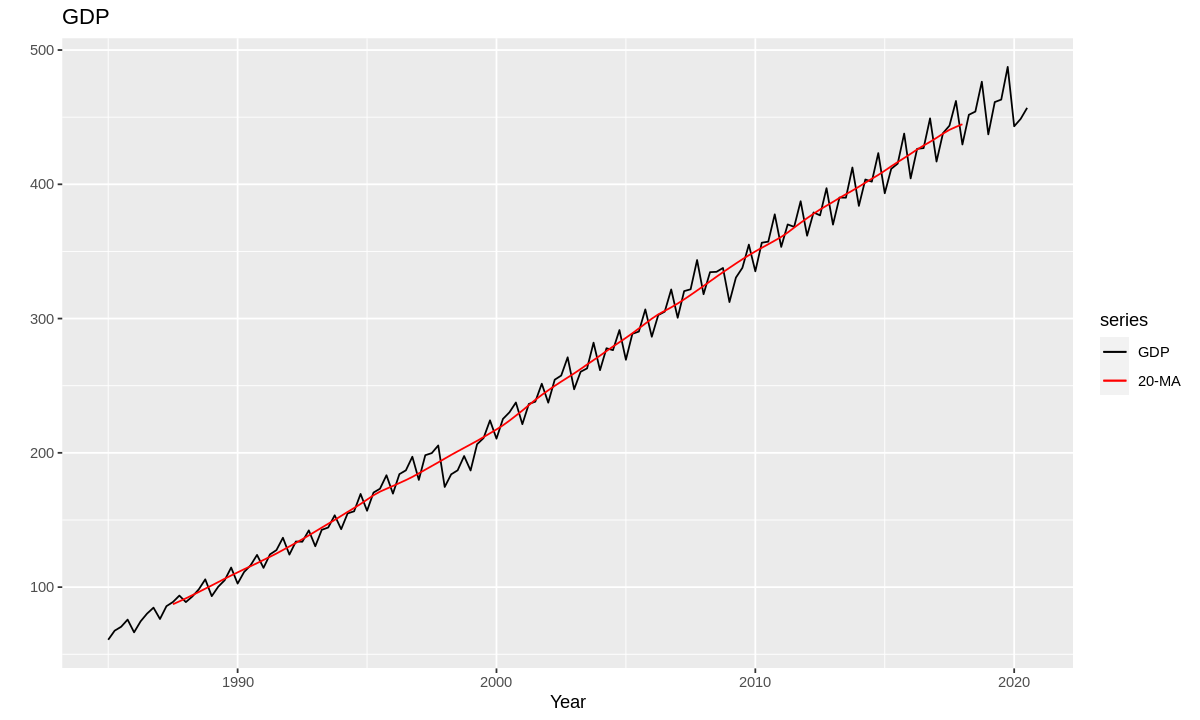

In [35]:
# 4분기 이동평균
GDP_SA = dataq_ts[,3]/1000
GDP = dataq_ts[,5]/1000
autoplot(GDP, series="GDP") +
  autolayer(ma(GDP, 4), series="4-MA") +
  xlab("Year") + ylab("") +
  ggtitle("GDP") +
  scale_colour_manual(values=c("GDP"="black","4-MA"="red"),
                      breaks=c("GDP","4-MA"))
# 40분기 이동평균
autoplot(GDP, series="GDP") +
  autolayer(ma(GDP, 20), series="20-MA") +
  xlab("Year") + ylab("") +
  ggtitle("GDP") +
  scale_colour_manual(values=c("GDP"="black","20-MA"="red"),
                      breaks=c("GDP","20-MA"))

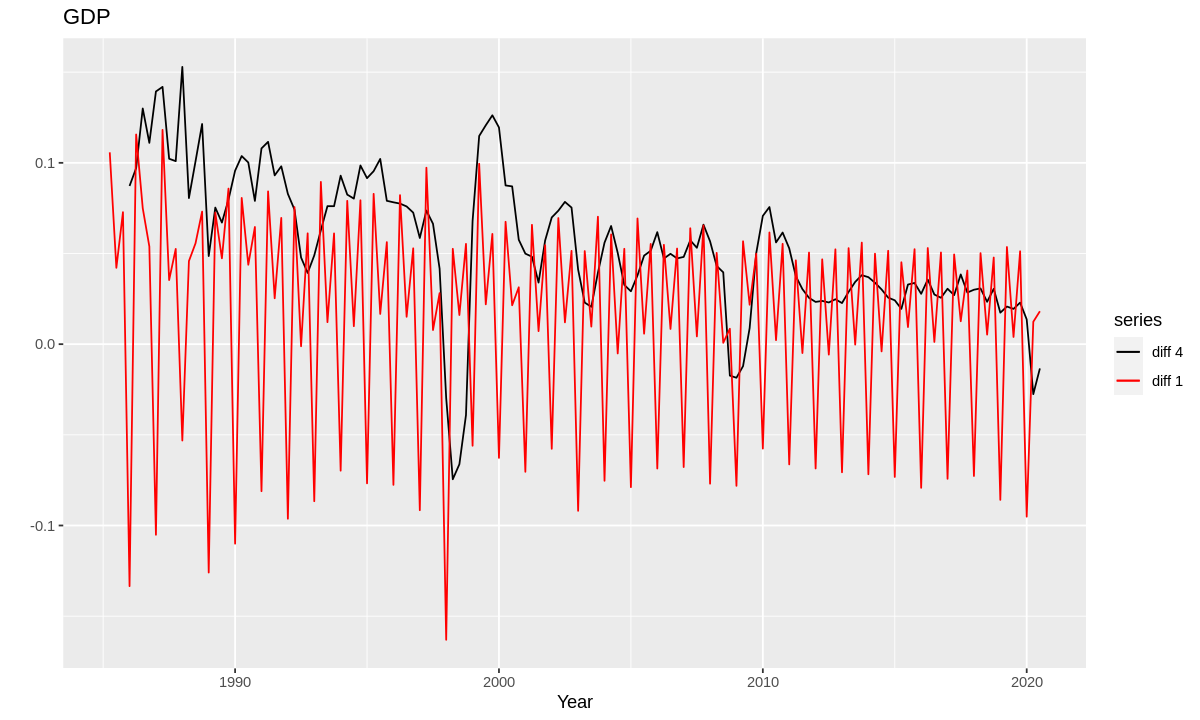

In [36]:
# 차분
autoplot(diff(log(GDP),4), series="diff 4") +
  autolayer(diff(log(GDP)), series="diff 1") +
  xlab("Year") + ylab("") +
  ggtitle("GDP") +
  scale_colour_manual(values=c("diff 4"="black","diff 1"="red"),
                      breaks=c("diff 4","diff 1"))

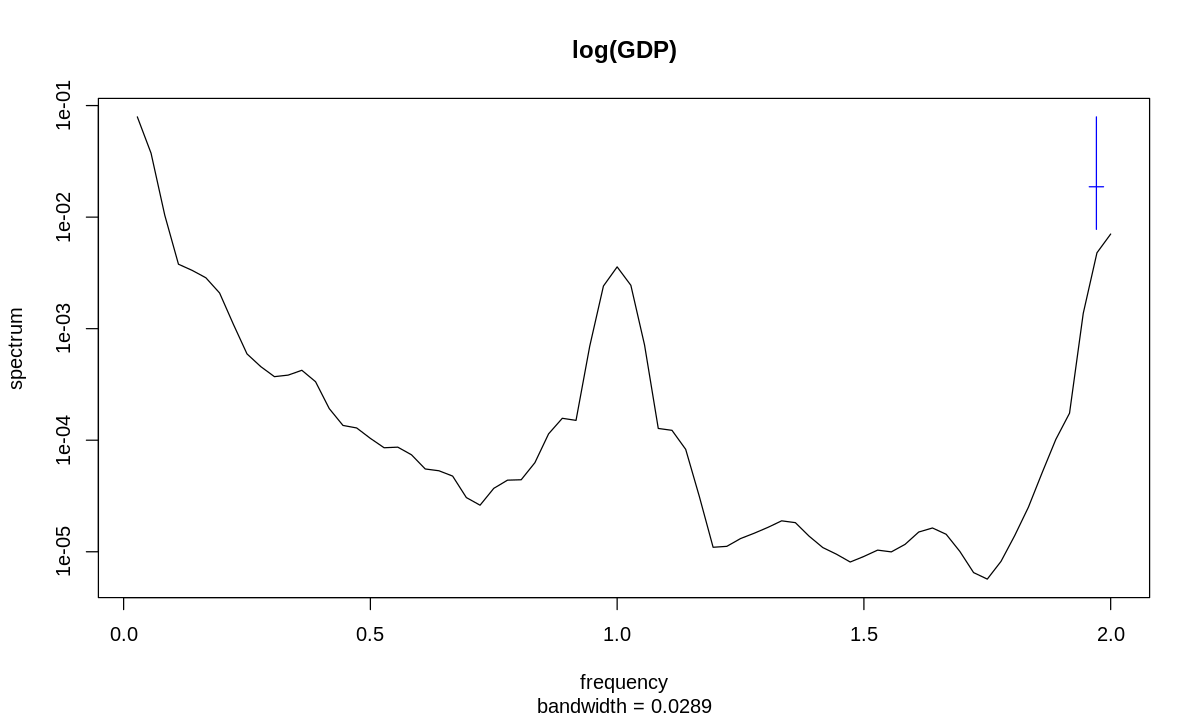

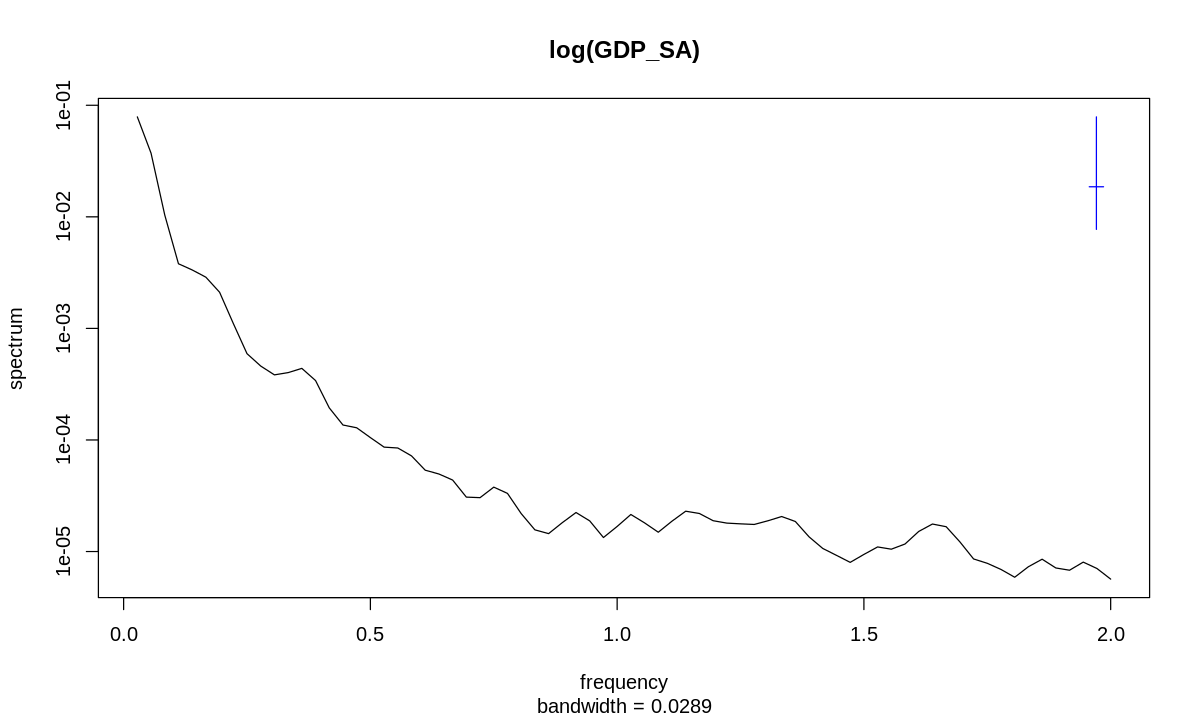

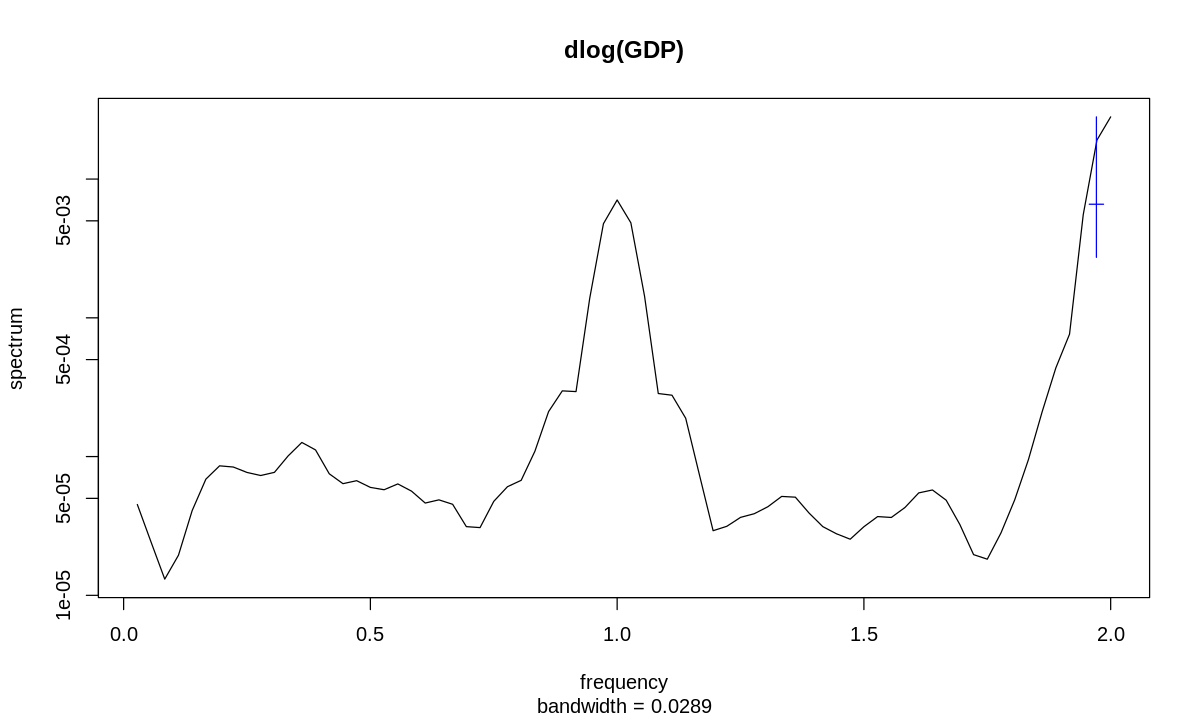

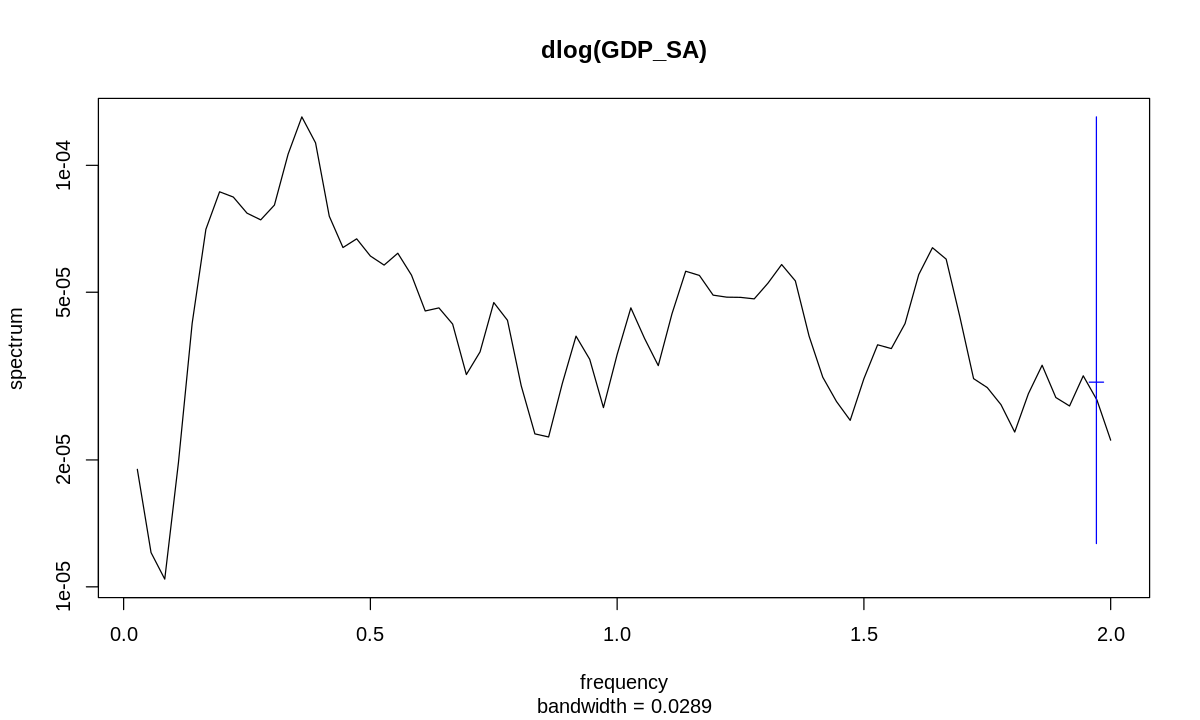

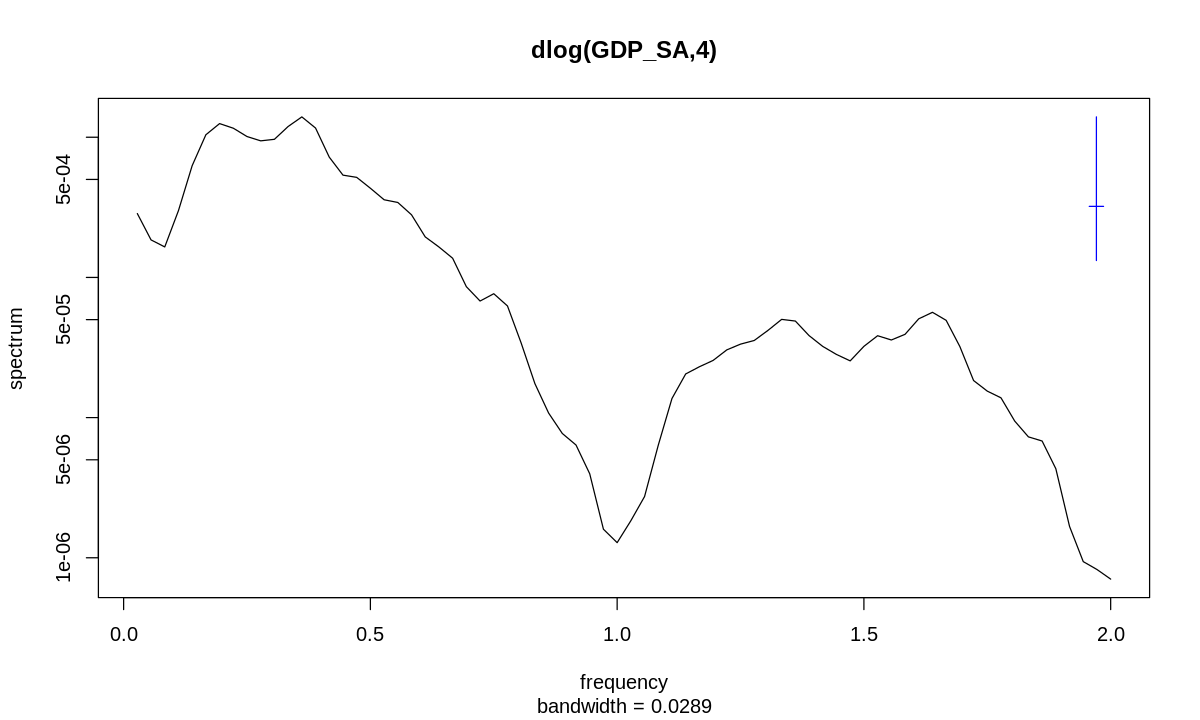

In [37]:
spectrum(log(GDP), spans=c(3,3), main="log(GDP)")
spectrum(log(GDP_SA), spans=c(3,3), main="log(GDP_SA)" )
spectrum(diff(log(GDP)), spans=c(3,3), main="dlog(GDP)")
spectrum(diff(log(GDP_SA)), spans=c(3,3), main="dlog(GDP_SA)")
spectrum(diff(log(GDP_SA),4), spans=c(3,3), main="dlog(GDP_SA,4)")

## 7. 시계열의 분해

In [38]:
install.packages("mFilter")
library(mFilter)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [39]:
lgdp.hp = mFilter(log(GDP_SA),filter="HP")   # Hodrick-Prescott filter
 gdp_t = exp(lgdp.hp$trend)
 gdpsam = exp(ma(log(GDP_SA),3))
 gdp_s = GDP/GDP_SA*100
 gdp_i = GDP_SA/gdpsam*100
 gdp_c = gdpsam/gdp_t*100

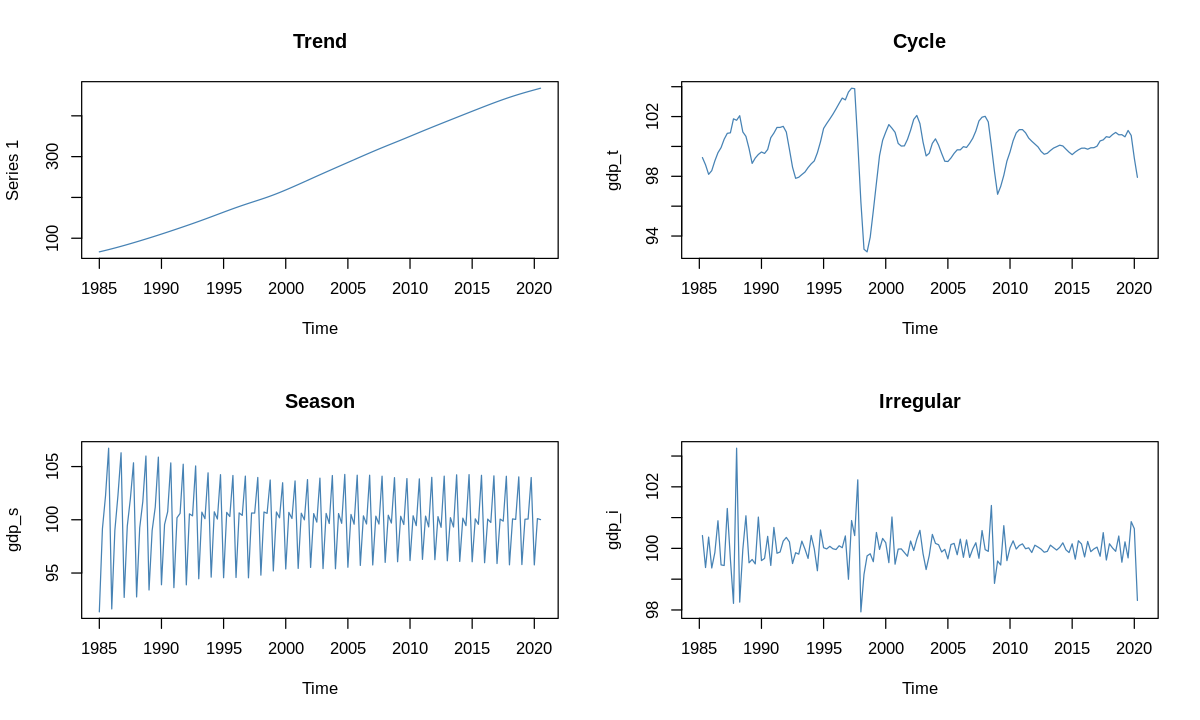

In [40]:
par(mfrow=c(2,2))
plot(gdp_t, main="Trend", col="steelblue")
plot(gdp_c, main="Cycle", col="steelblue")
plot(gdp_s, main="Season", col="steelblue")
plot(gdp_i, main="Irregular", col="steelblue")
par(mfrow=c(1,1))

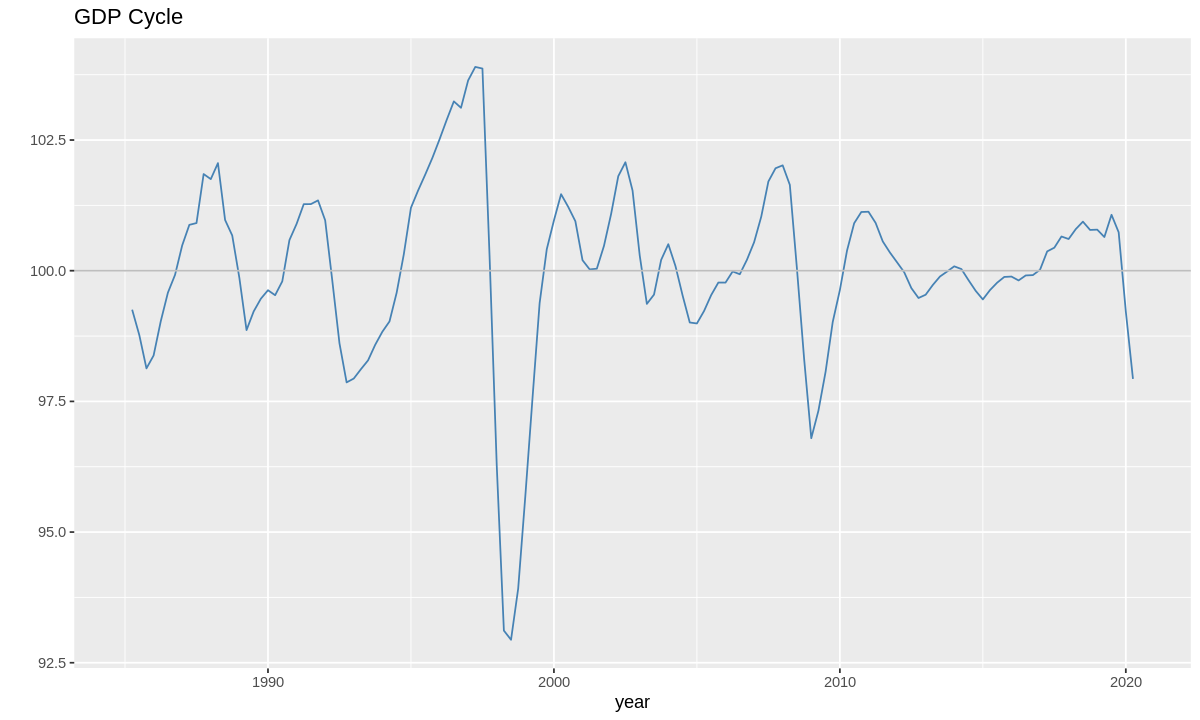

In [41]:
p <- autoplot(gdp_c, color="steelblue")+ ggtitle("GDP Cycle") +
     ylab("") +  xlab("year")
p + geom_hline(yintercept = 100, color="gray")  

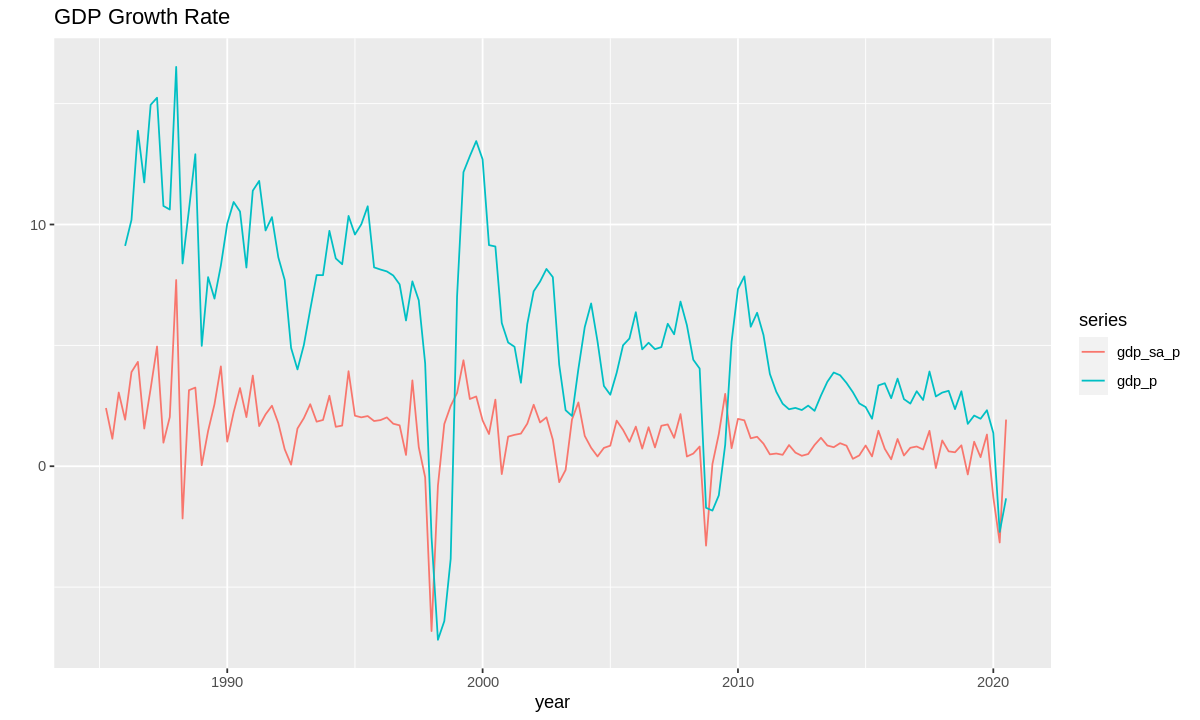

In [42]:
autoplot(dataq_ts[, c(18,22)])+
  ggtitle("GDP Growth Rate") +
  ylab("") +
  xlab("year")

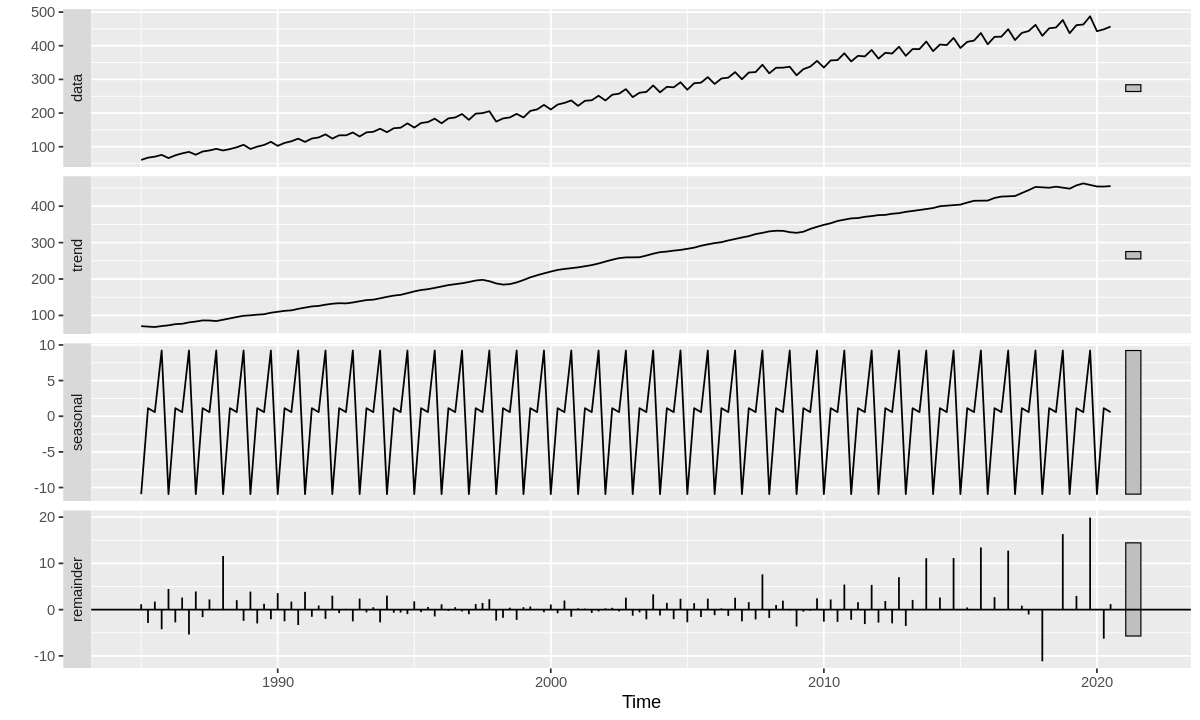

In [43]:
GDP %>%
  stl(t.window=5, s.window="periodic", robust=TRUE) %>%
  autoplot()

## 8. 시계열 예측

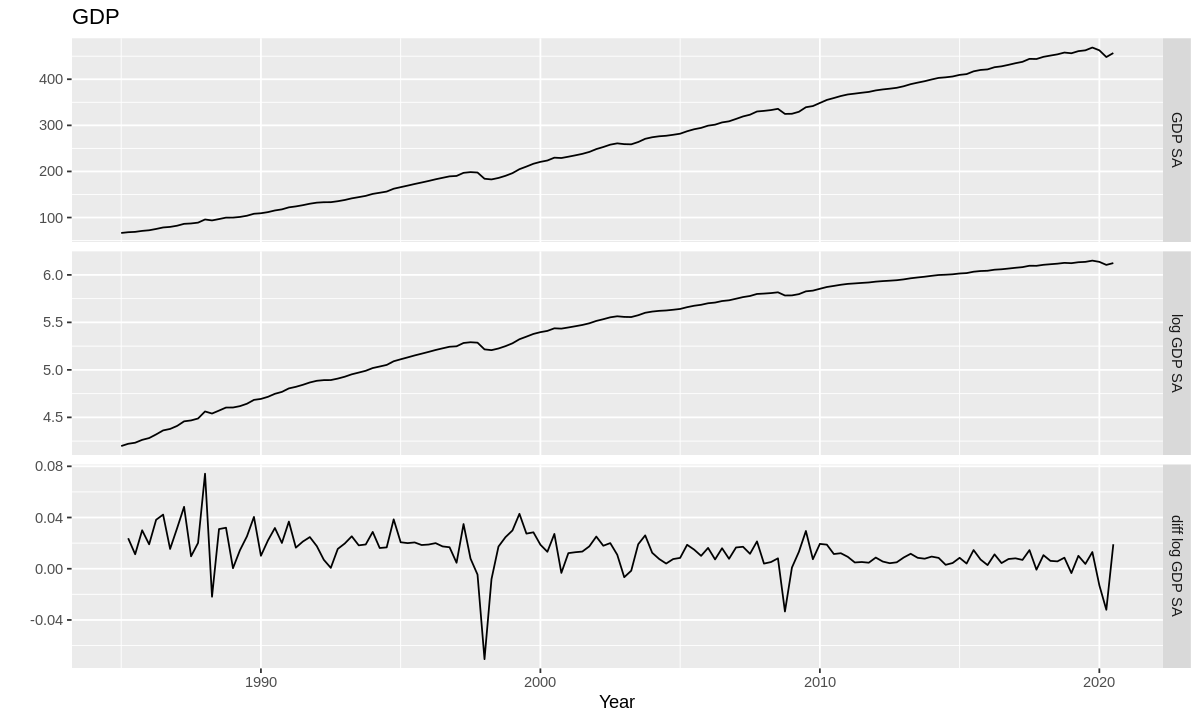

In [44]:
cbind("GDP SA" = GDP_SA,
      "log GDP SA" = log(GDP_SA),
      "diff log GDP SA" = diff(log(GDP_SA))) %>%
  autoplot(facets=TRUE) +
    xlab("Year") + ylab("") +
    ggtitle("GDP")

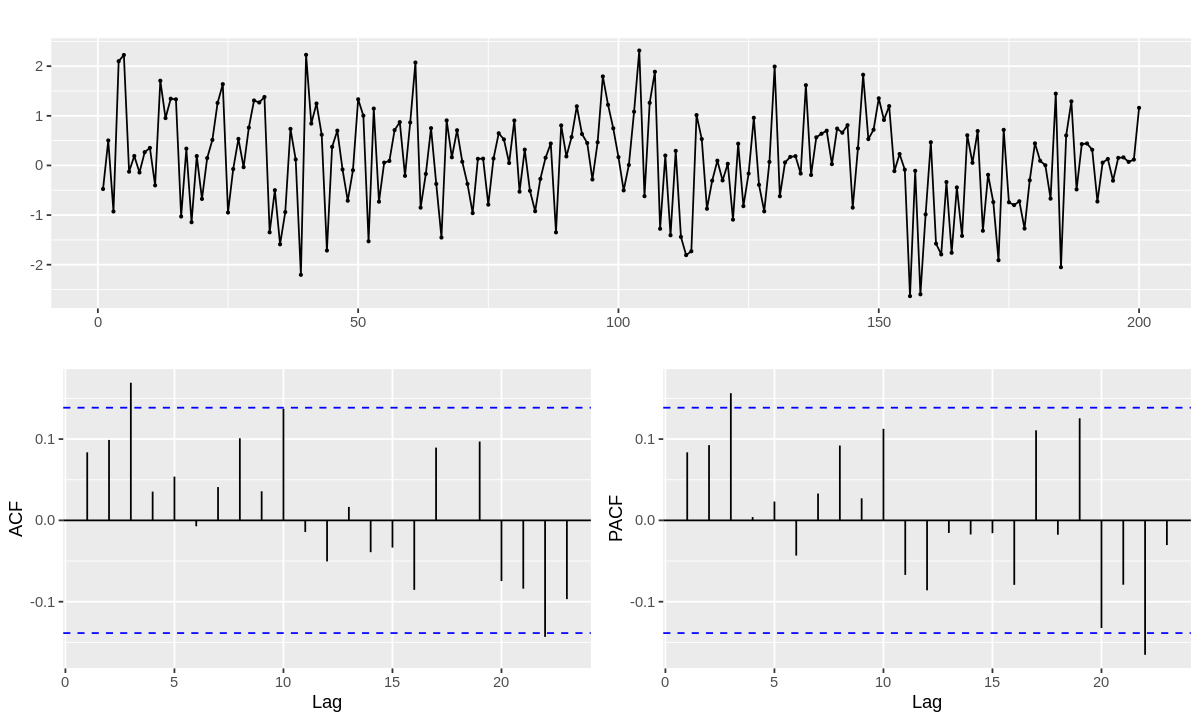

In [45]:
rnorm(200) %>% ggtsdisplay(main="")

In [46]:
gdp_sa_p = dataq_ts[, 18]

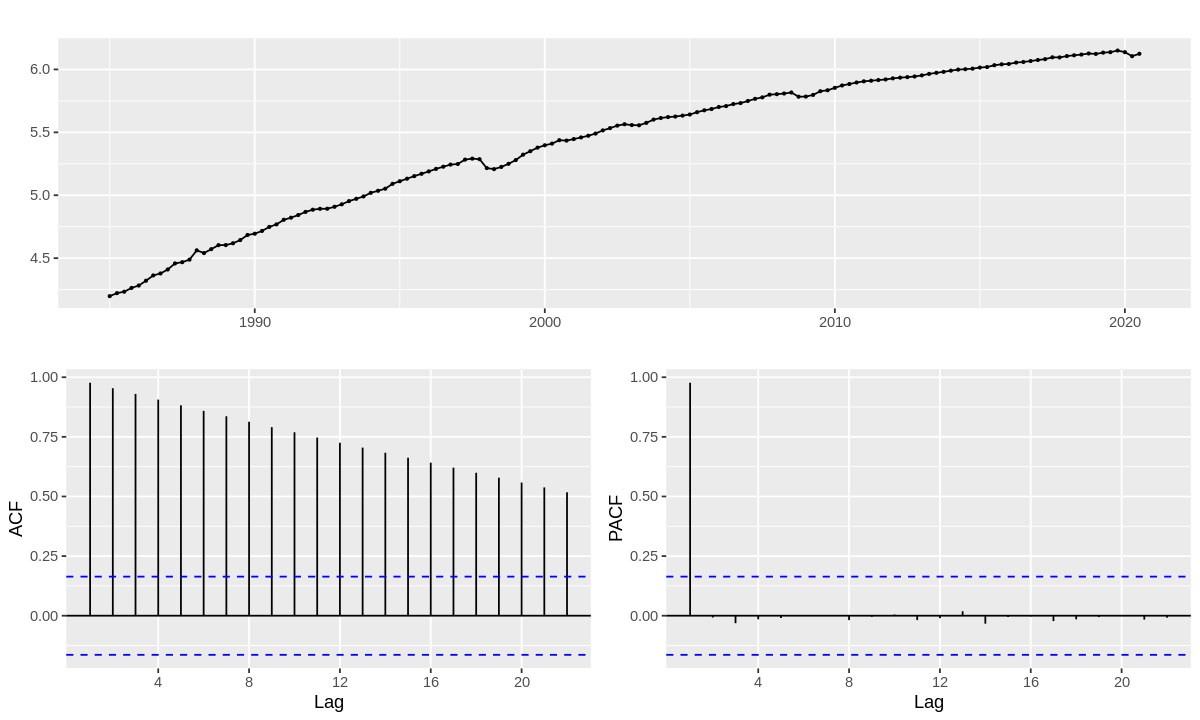

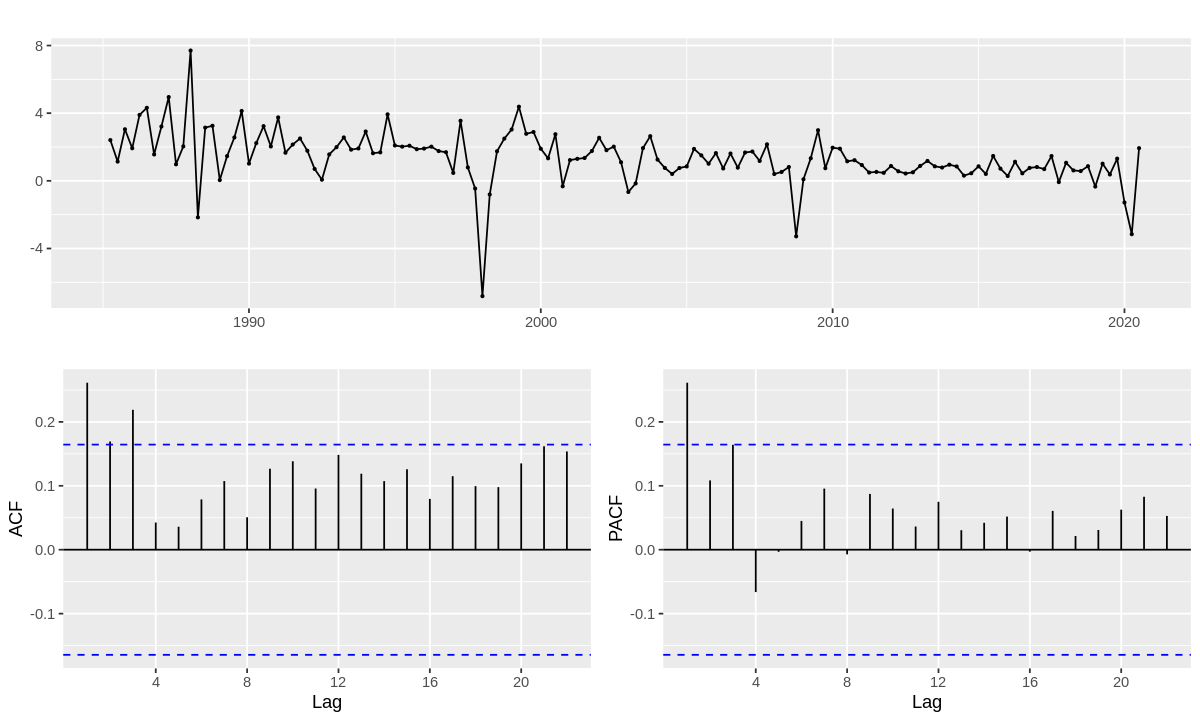

In [47]:
GDP_SA %>% log() %>% ggtsdisplay(main="")
gdp_sa_p %>% ggtsdisplay(main="")

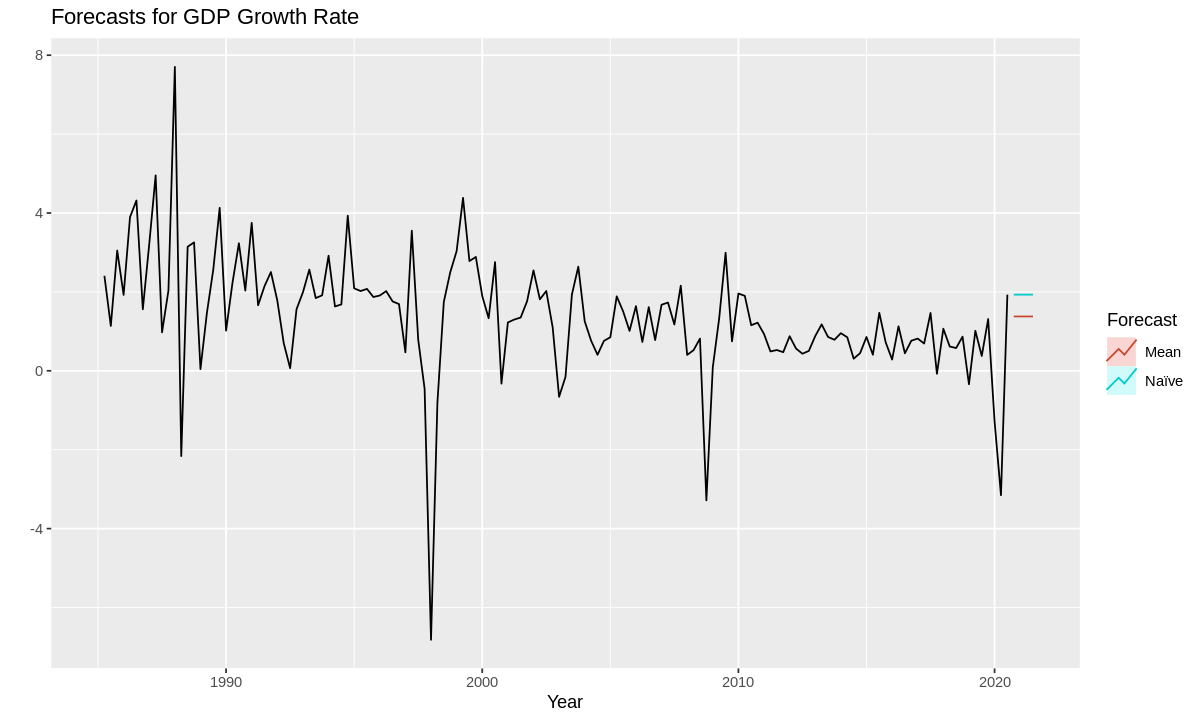

In [48]:
autoplot(gdp_sa_p) +
  autolayer(meanf(gdp_sa_p, h=4),  series="Mean", PI=FALSE) +
  autolayer(naive(gdp_sa_p, h=4),  series="Naïve", PI=FALSE) +
  #autolayer(snaive(gdp_sa_p, h=11),series="Seasonal naïve", PI=FALSE) +
  ggtitle("Forecasts for GDP Growth Rate") +
  xlab("Year") + ylab("") +
  guides(colour=guide_legend(title="Forecast"))

In [49]:
model1 = gdp_sa_p %>% auto.arima()
model1 %>% summary()

Series: . 
ARIMA(0,1,1)(0,0,1)[4] 

Coefficients:
          ma1     sma1
      -0.9110  -0.1973
s.e.   0.0344   0.0965

sigma^2 estimated as 2.03:  log likelihood=-250.1
AIC=506.2   AICc=506.38   BIC=515.05

Training set error measures:
                     ME     RMSE       MAE       MPE     MAPE      MASE
Training set -0.2099526 1.409755 0.8611641 -34.40492 120.9819 0.6349027
                   ACF1
Training set 0.04714119



	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,0,1)[4]
Q* = 9.0768, df = 6, p-value = 0.1693

Model df: 2.   Total lags used: 8



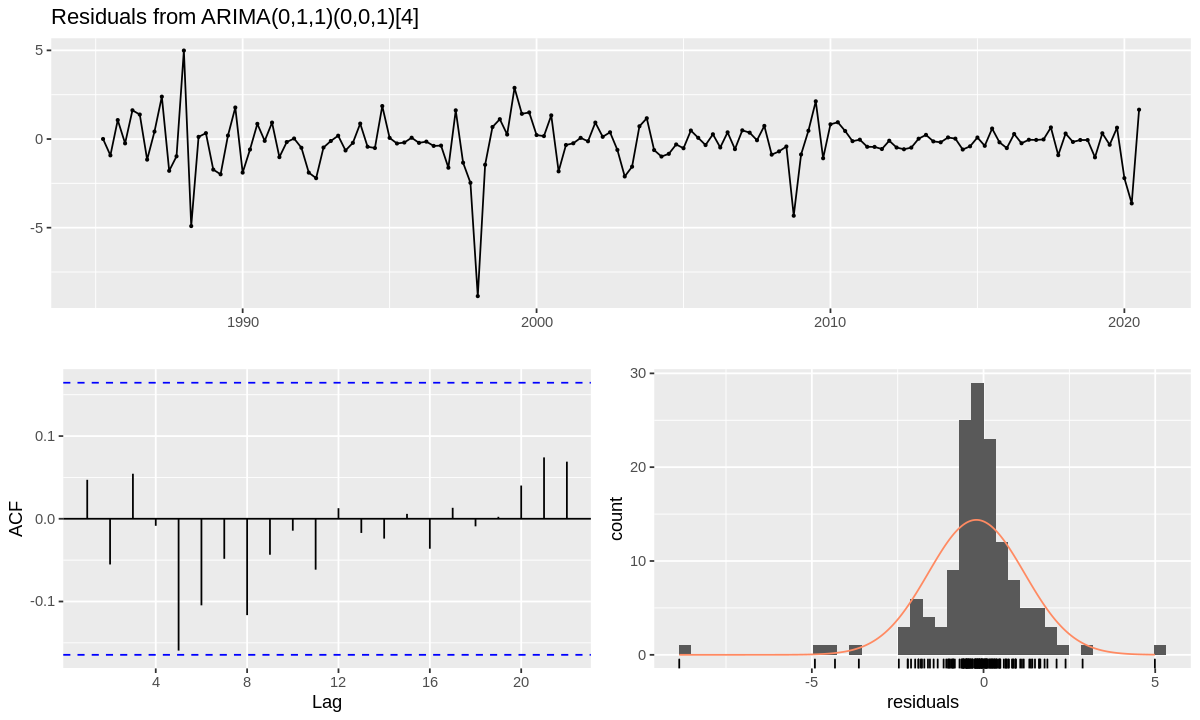

In [50]:
model1 %>% checkresiduals()

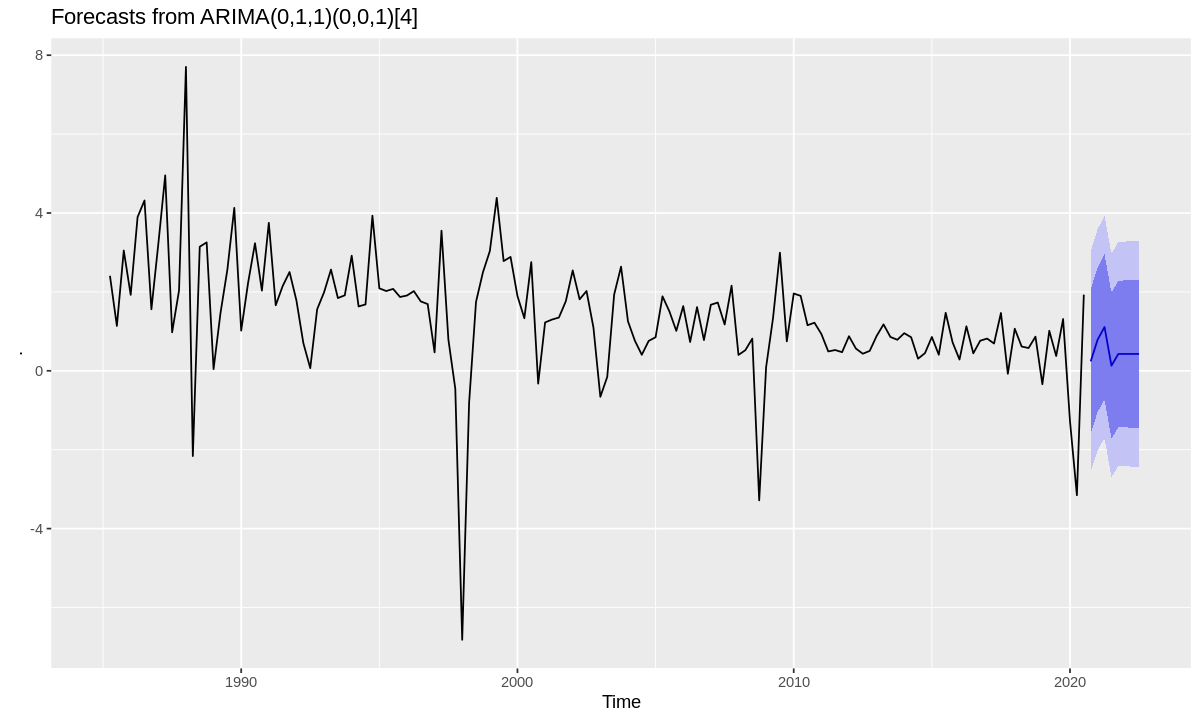

In [51]:
model1 %>% forecast() %>% autoplot() 

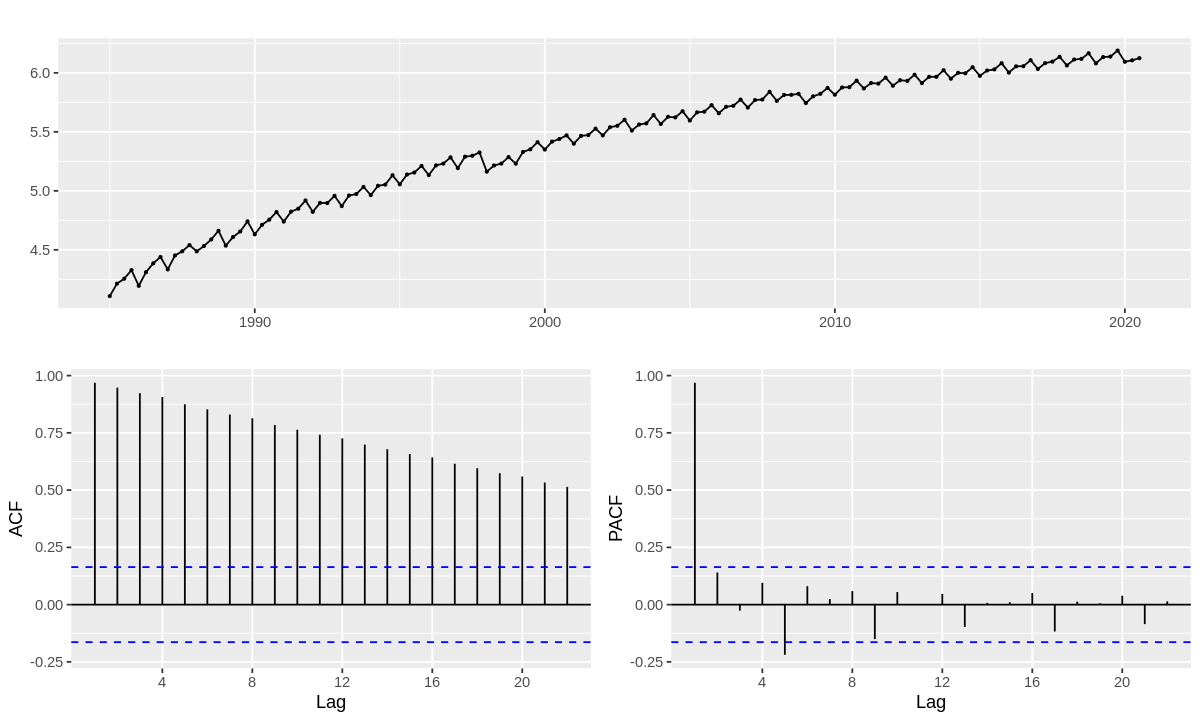

In [52]:
 GDP %>% log() %>% ggtsdisplay(main="")

In [53]:
model2 = GDP %>% auto.arima()
model2 %>% summary()

Series: . 
ARIMA(3,0,0)(0,1,1)[4] with drift 

Coefficients:
         ar1      ar2      ar3     sma1   drift
      0.9654  -0.0526  -0.2064  -0.4538  2.8373
s.e.  0.0838   0.1272   0.0932   0.0898  0.1484

sigma^2 estimated as 13.9:  log likelihood=-378.79
AIC=769.58   AICc=770.22   BIC=787.19

Training set error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.01279307 3.608876 2.411035 -0.1616095 1.104595 0.1958816
                    ACF1
Training set 0.001399999



	Ljung-Box test

data:  Residuals from ARIMA(3,0,0)(0,1,1)[4] with drift
Q* = 0.85602, df = 3, p-value = 0.836

Model df: 5.   Total lags used: 8



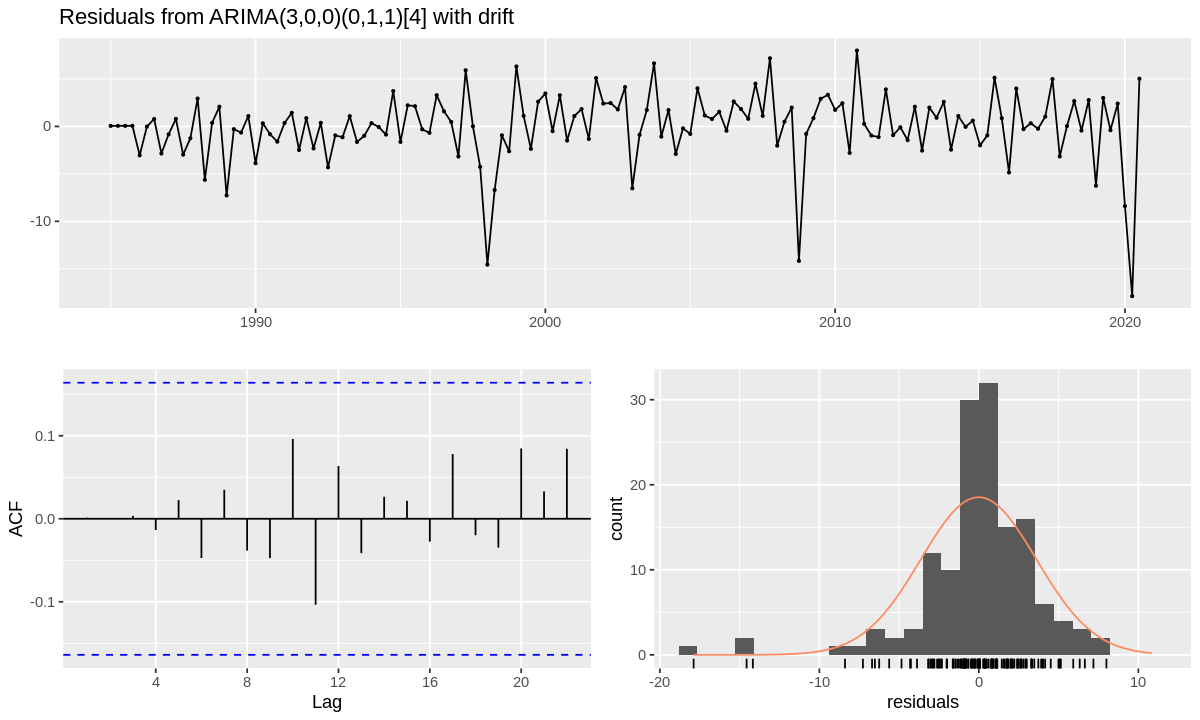

In [54]:
model2 %>% checkresiduals()

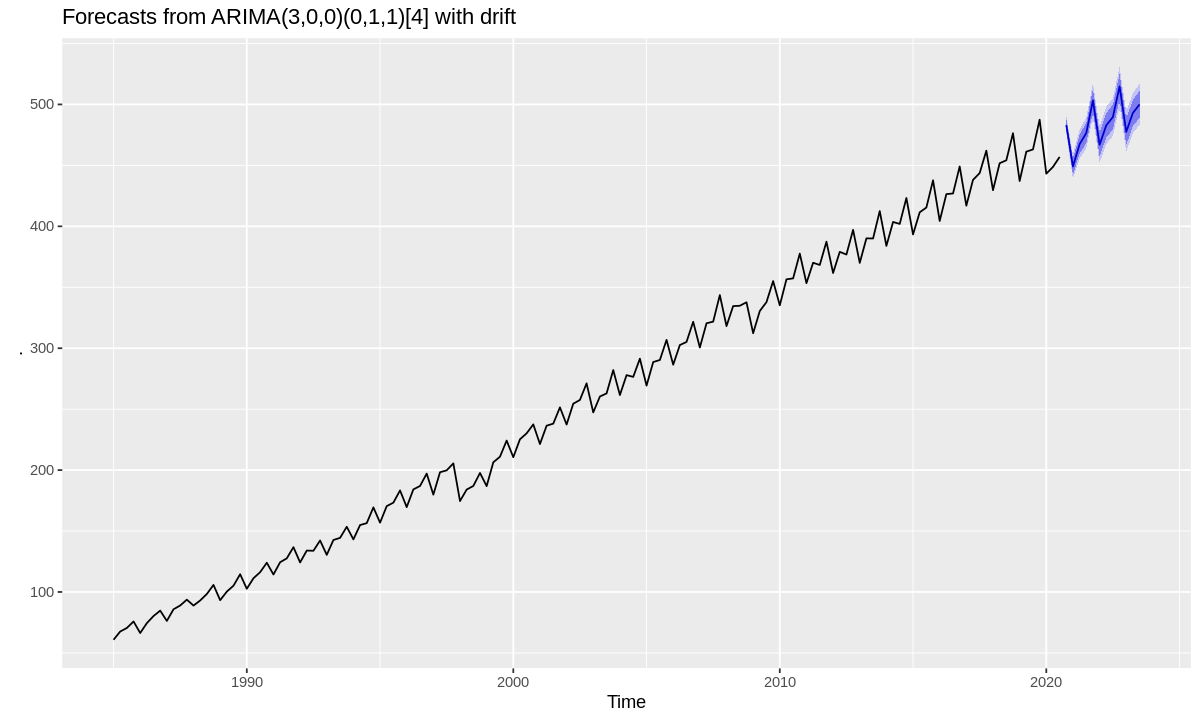

In [55]:
model2 %>% forecast(h=12) %>% autoplot() 

## 9. 회귀분석

In [56]:
install.packages("GGally")
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



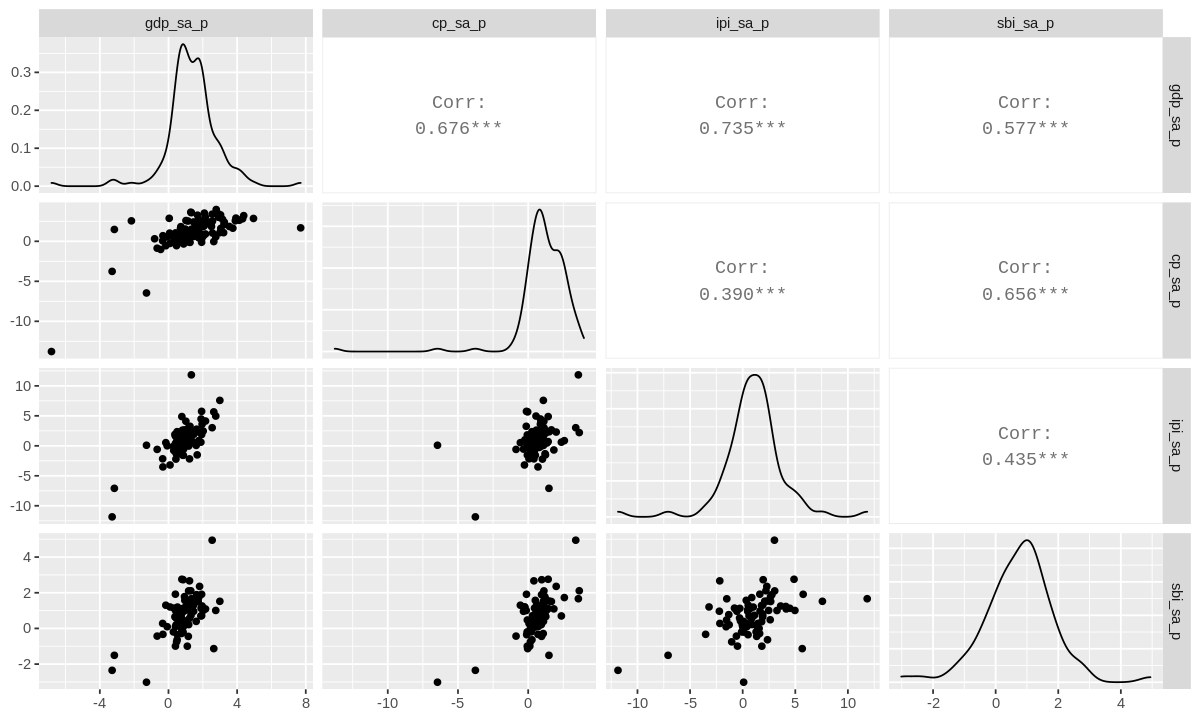

In [57]:
dataq %>% select(gdp_sa_p, cp_sa_p, ipi_sa_p, sbi_sa_p) %>%
  GGally::ggpairs()

In [58]:
fit1 <- dataq_ts %>% tslm(gdp_sa_p ~ ipi_sa_p + sbi_sa_p, data=.)
fit1 %>% summary()


Call:
tslm(formula = gdp_sa_p ~ ipi_sa_p + sbi_sa_p, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0191 -0.3202  0.0506  0.3974  1.3130 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48503    0.08097   5.991 5.87e-08 ***
ipi_sa_p     0.20363    0.02620   7.773 2.41e-11 ***
sbi_sa_p     0.27455    0.06636   4.138 8.70e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6136 on 79 degrees of freedom
  (61 observations deleted due to missingness)
Multiple R-squared:  0.6221,	Adjusted R-squared:  0.6126 
F-statistic: 65.03 on 2 and 79 DF,  p-value: < 2.2e-16


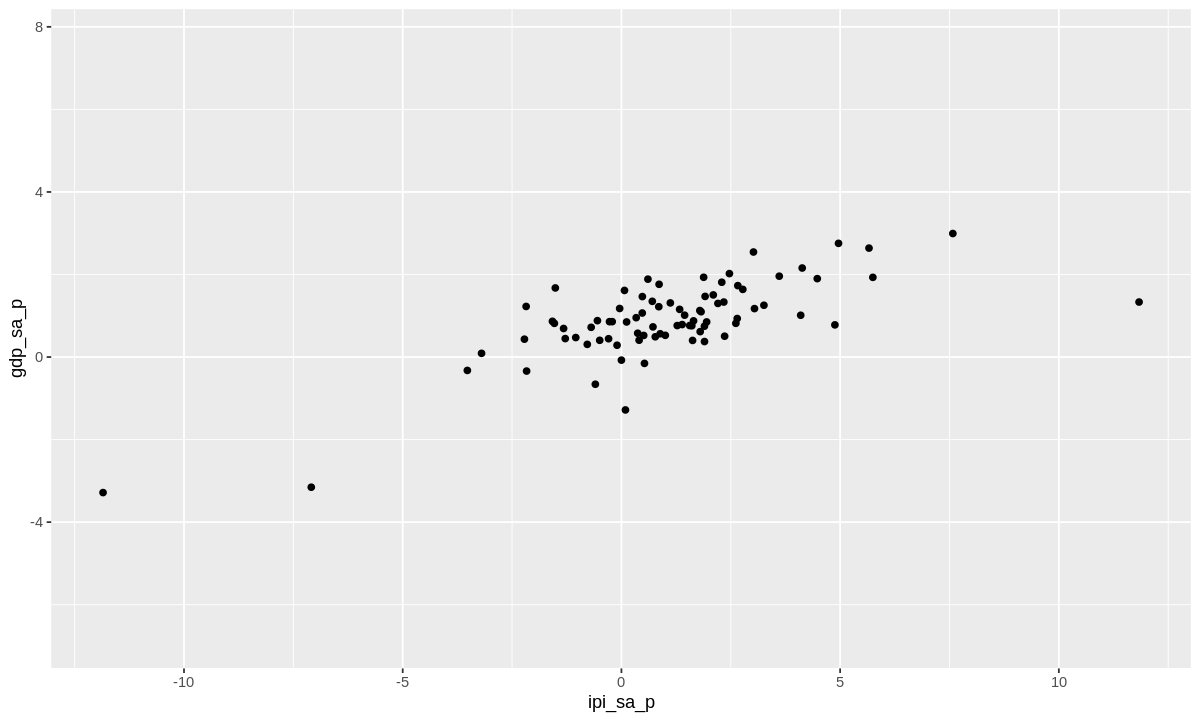

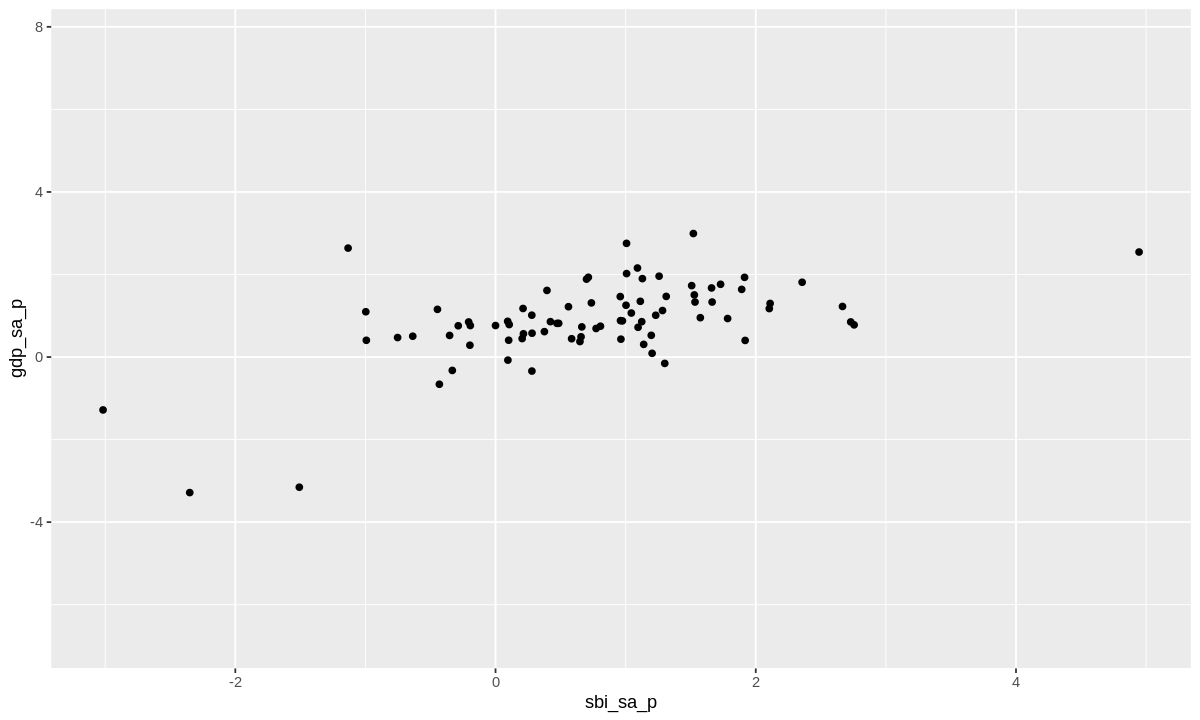

In [59]:
ggplot(data=dataq, aes(ipi_sa_p,gdp_sa_p)) +
  geom_point() 
  #geom_abline(intercept=0.48, slope=0.2036) 

ggplot(data=dataq, aes(sbi_sa_p,gdp_sa_p)) +
  geom_point()  
  #geom_abline(intercept=0.48, slope=0.2746) 


	Breusch-Godfrey test for serial correlation of order up to 8

data:  Residuals from Linear regression model
LM test = 13.21, df = 8, p-value = 0.1048


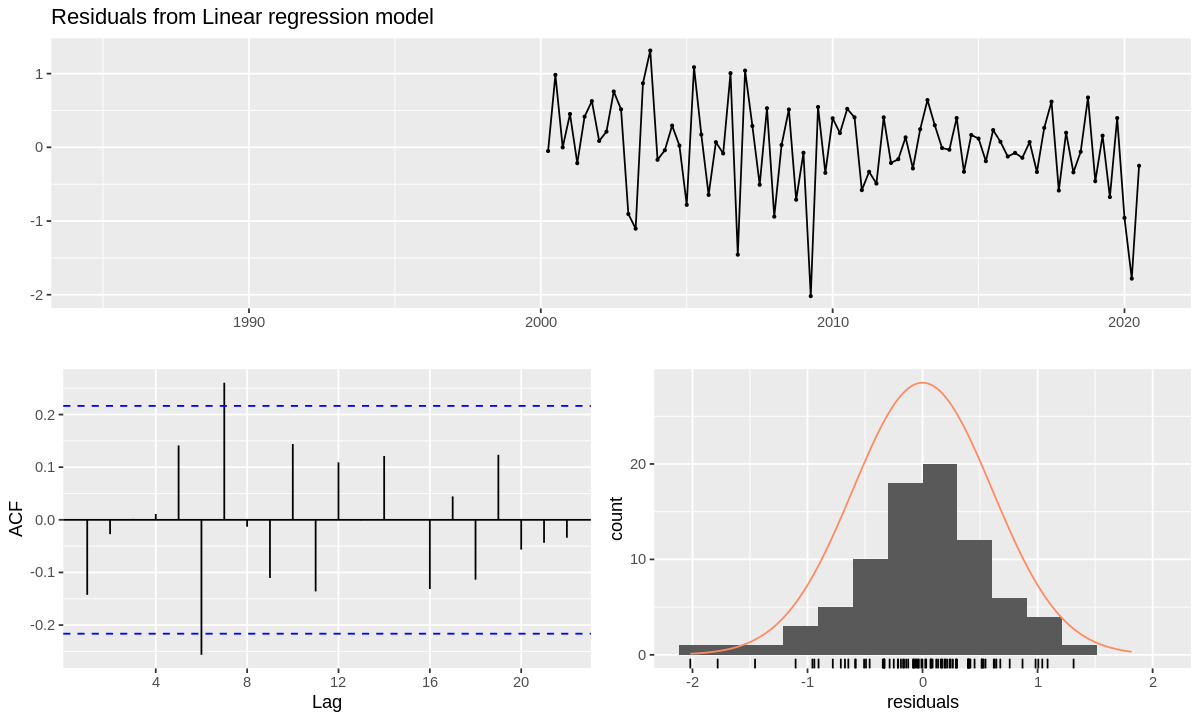

In [60]:
fit1 %>% checkresiduals()

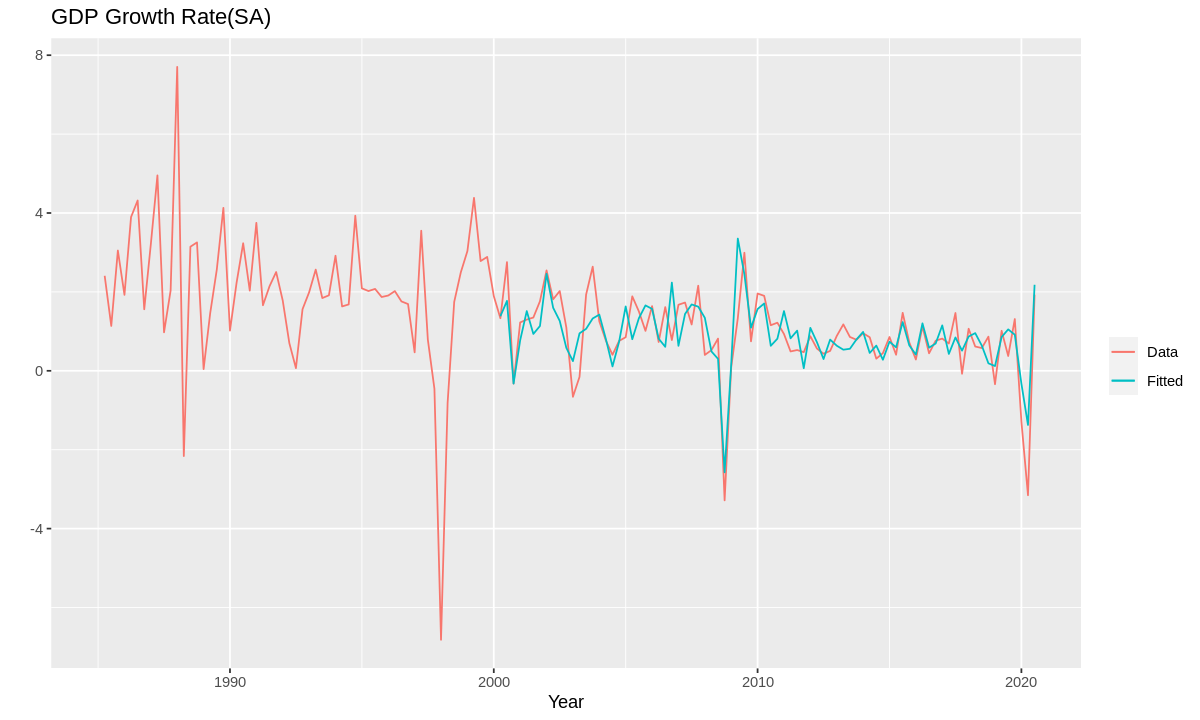

In [61]:
autoplot(dataq_ts[,'gdp_sa_p'], series="Data") +
  autolayer(fitted(fit1), series="Fitted") +
  xlab("Year") + ylab("") +
  ggtitle("GDP Growth Rate(SA)") +
  guides(colour=guide_legend(title=" "))

In [62]:
ipi_sa_p = dataq_ts[, 19]
sbi_sa_p = dataq_ts[, 20]
fit2 = auto.arima(gdp_sa_p, xreg=cbind(ipi_sa_p, sbi_sa_p))
fit2 %>% summary()

Series: gdp_sa_p 
Regression with ARIMA(0,1,2) errors 

Coefficients:
          ma1     ma2  ipi_sa_p  sbi_sa_p
      -1.2808  0.3468    0.2777    0.1996
s.e.   0.1508  0.1469    0.0654    0.0239

sigma^2 estimated as 0.2135:  log likelihood=-74.99
AIC=159.98   AICc=160.78   BIC=171.96

Training set error measures:
                      ME      RMSE      MAE       MPE     MAPE      MASE
Training set -0.09683979 0.5973087 0.416179 -36.07182 81.20245 0.3068326
                   ACF1
Training set -0.0121596



	Ljung-Box test

data:  Residuals from Regression with ARIMA(0,1,2) errors
Q* = 6.6379, df = 4, p-value = 0.1563

Model df: 4.   Total lags used: 8



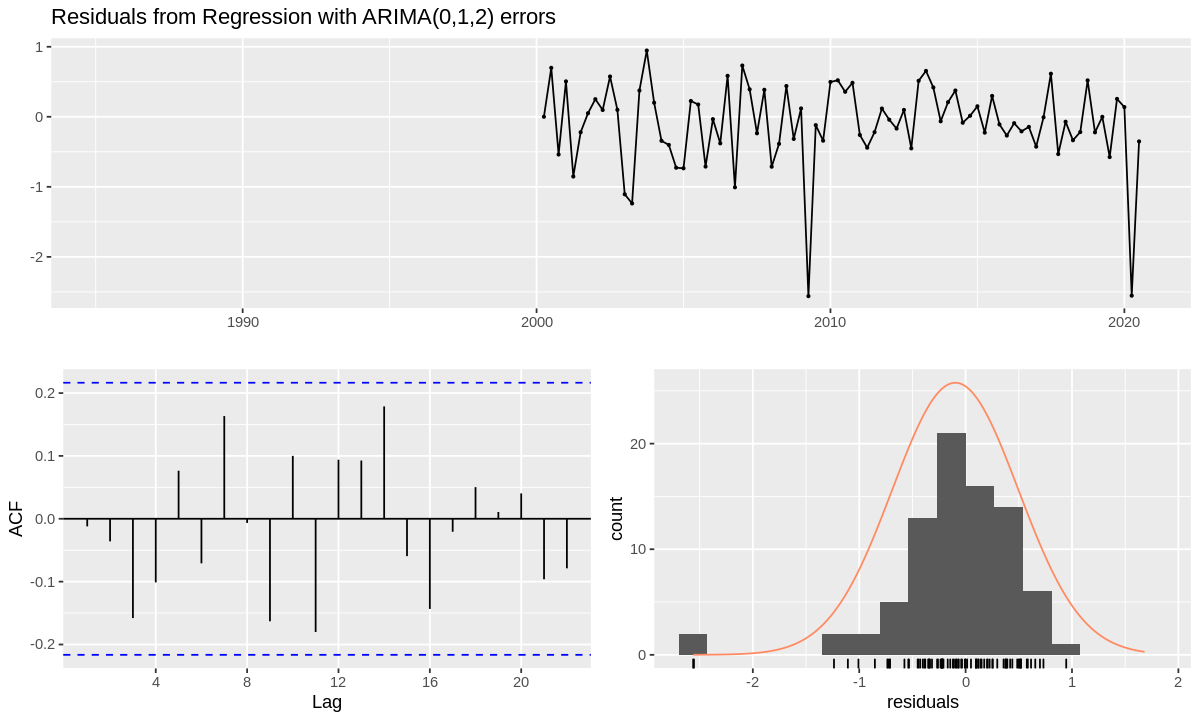

In [63]:
fit2 %>% checkresiduals()

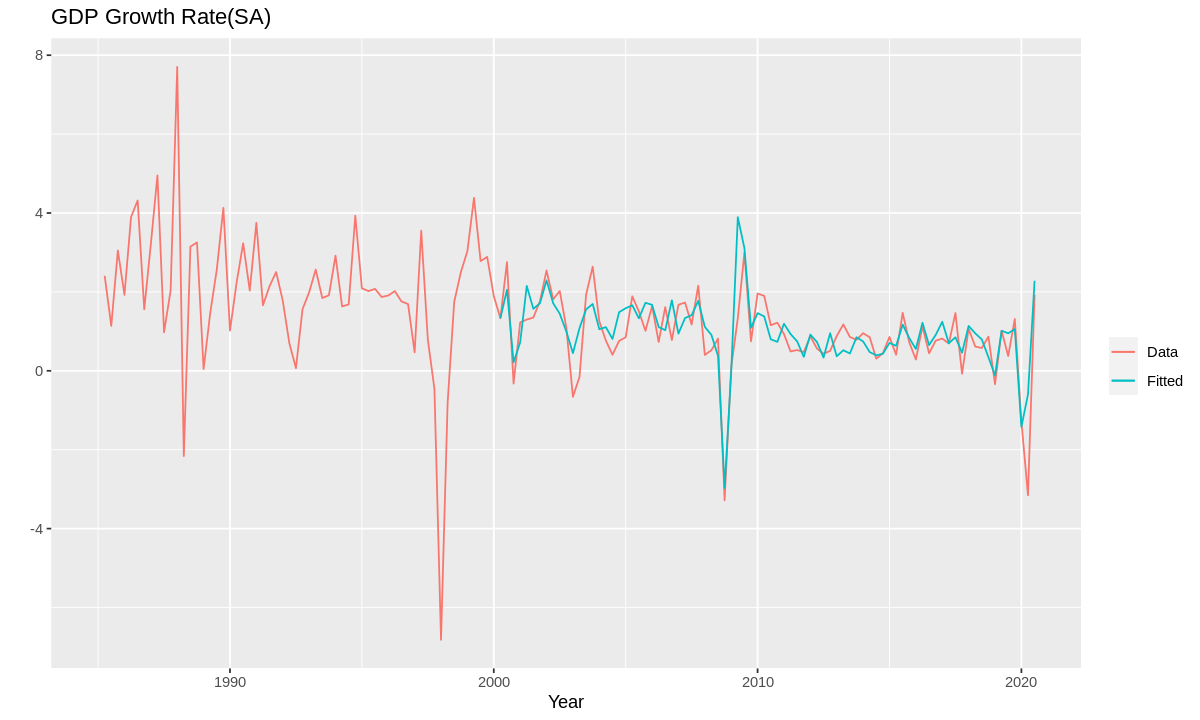

In [64]:
autoplot(dataq_ts[,'gdp_sa_p'], series="Data") +
  autolayer(fitted(fit2), series="Fitted") +
  xlab("Year") + ylab("") +
  ggtitle("GDP Growth Rate(SA)") +
  guides(colour=guide_legend(title=" "))

In [65]:
tail(fitted(fit2))

,Qtr1,Qtr2,Qtr3,Qtr4
2019,,1.0149322,0.9504337,1.0563174
2020,-1.4206014,-0.6001826,2.2826936,


## 10. VAR 모형

* 출처 : https://bookdown.org/ccolonescu/RPoE4/vec-and-var-models.html#estimating-a-var-model

In [79]:
install.packages("vars")
library(vars)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘strucchange’, ‘sandwich’


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary


Loading required package: urca

Loading required package: lmtest



In [88]:
install.packages("devtools")
devtools::install_git("https://github.com/ccolonescu/PoEdata")
library(PoEdata) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


'/usr/bin/git' clone --depth 1 --no-hardlinks https://github.com/ccolonescu/PoEdata /tmp/RtmpeMwKXO/file3975a8b31e



✔  checking for file ‘/tmp/RtmpeMwKXO/file3975a8b31e/DESCRIPTION’
─  preparing ‘PoEdata’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘PoEdata_0.1.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,c,y
1960 Q1,7.479017,7.578401
1960 Q2,7.491590,7.583807
1960 Q3,7.487622,7.584671
1960 Q4,7.488965,7.584061
1961 Q1,7.488685,7.593122
1961 Q2,7.503455,7.608077


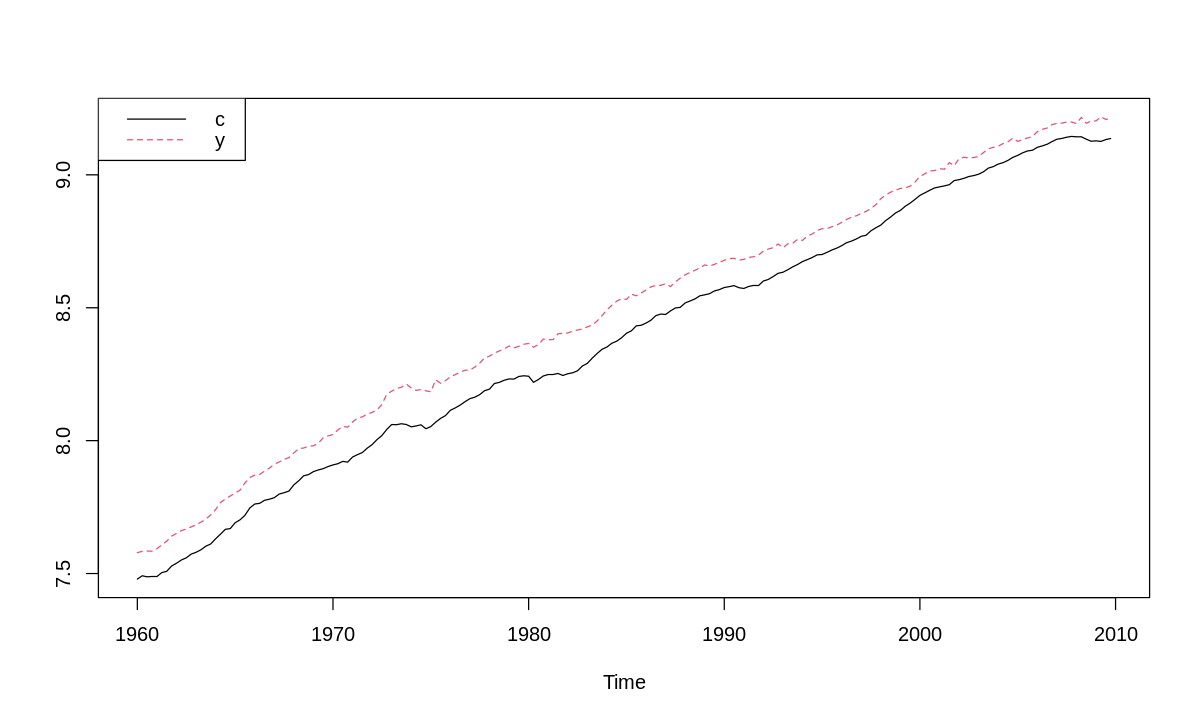

In [97]:
data("fred", package="PoEdata")
fred = ts(fred, start=1960,frequency=4)
head(fred)
ts.plot(fred[,1],fred[,2], type="l", lty=c(1,2), col=c(1,2))
  legend("topleft", legend=c("c","y"), lty=c(1,2), col=c(1,2))

In [98]:
library(vars)
Dc <- diff(fred[,1])
Dy <- diff(fred[,2])
varmat <- as.matrix(cbind(Dc,Dy))
varfit <- VAR(varmat) 
summary(varfit)


VAR Estimation Results:
Endogenous variables: Dc, Dy 
Deterministic variables: const 
Sample size: 198 
Log Likelihood: 1400.444 
Roots of the characteristic polynomial:
0.3441 0.3425
Call:
VAR(y = varmat)


Estimation results for equation Dc: 
Dc = Dc.l1 + Dy.l1 + const 

       Estimate Std. Error t value Pr(>|t|)    
Dc.l1 0.2156068  0.0747486   2.884  0.00436 ** 
Dy.l1 0.1493798  0.0577343   2.587  0.01040 *  
const 0.0052776  0.0007573   6.969 4.81e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.006575 on 195 degrees of freedom
Multiple R-Squared: 0.1205,	Adjusted R-squared: 0.1115 
F-statistic: 13.36 on 2 and 195 DF,  p-value: 3.661e-06 


Estimation results for equation Dy: 
Dy = Dc.l1 + Dy.l1 + const 

        Estimate Std. Error t value Pr(>|t|)    
Dc.l1  0.4754276  0.0973264   4.885 2.15e-06 ***
Dy.l1 -0.2171679  0.0751730  -2.889   0.0043 ** 
const  0.0060367  0.0009861   6.122 4.99e-09 ***
---
Signif. codes:  0 ‘***’

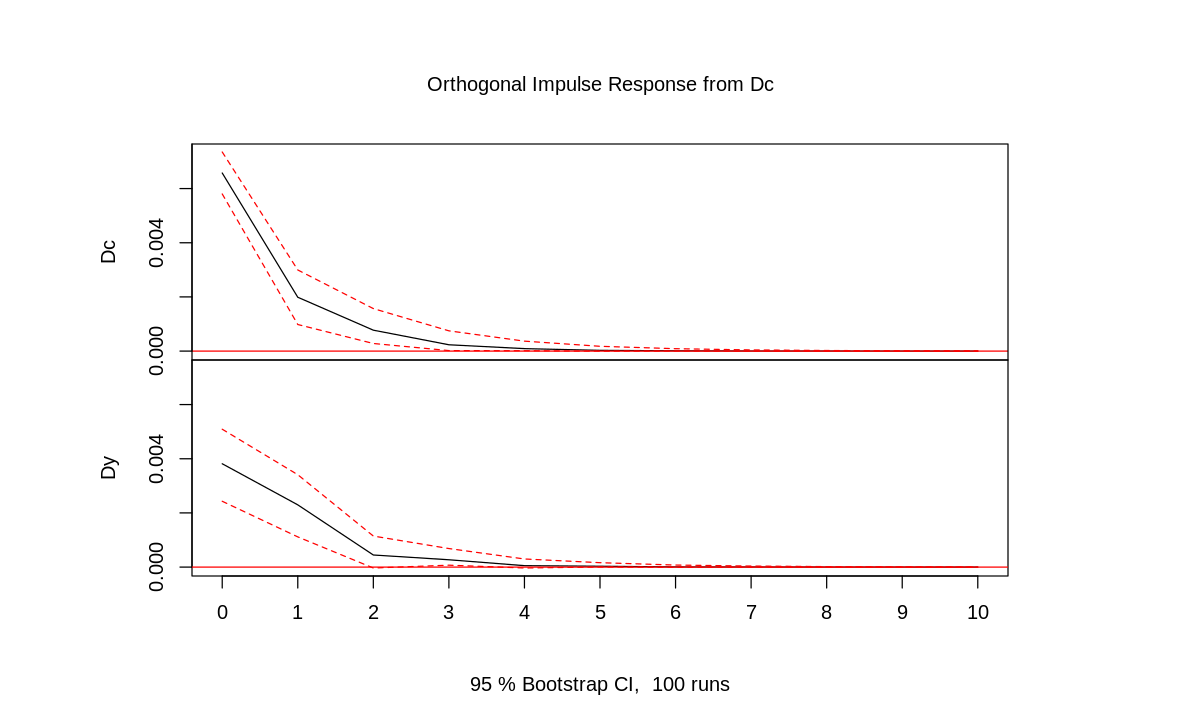

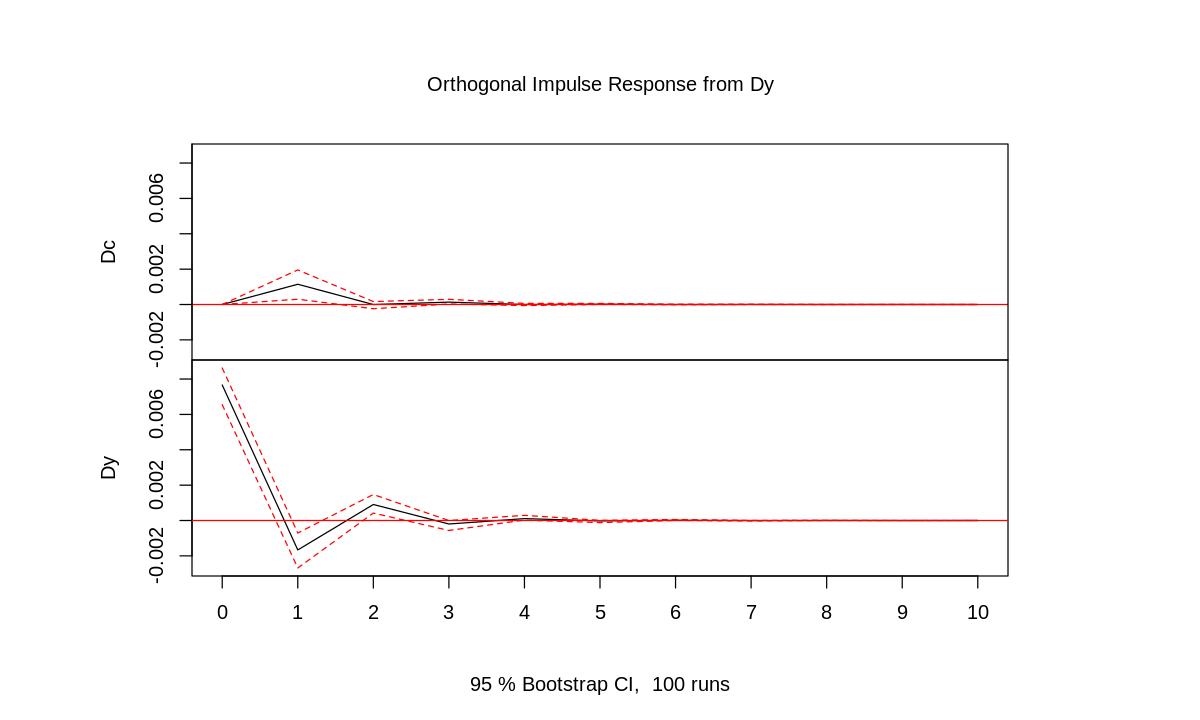

In [91]:
impresp <- irf(varfit)
plot(impresp)

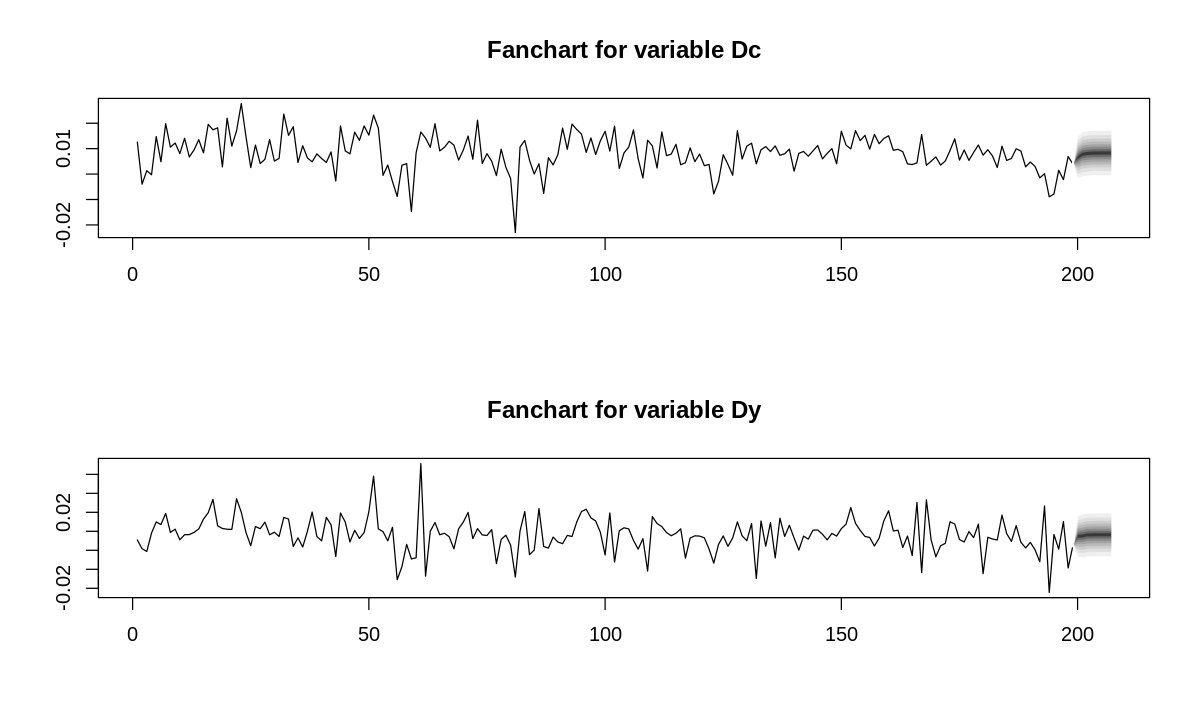

In [92]:
varfit.pred <- predict(varfit, n.ahead = 8, ci = 0.95)
fanchart(varfit.pred)

## 11. GAPMINDER 데이터 시각화

In [67]:
library(modelr)

In [68]:
install.packages("gapminder")
library(gapminder)
gapminder


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414


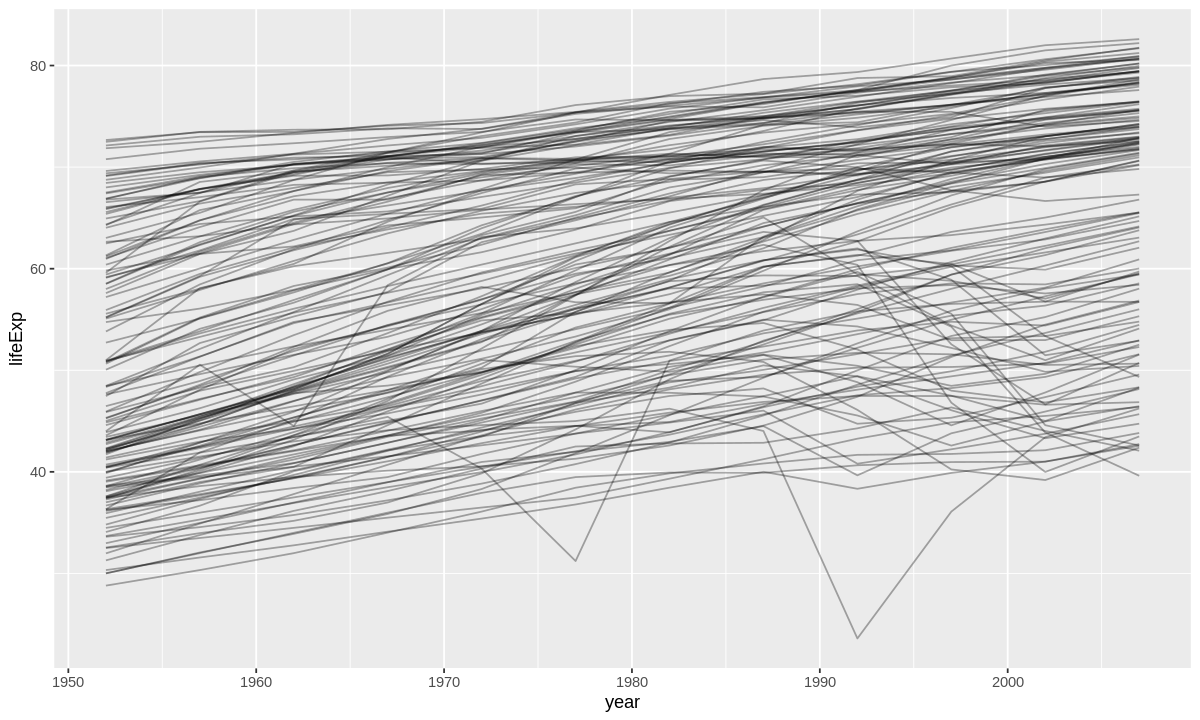

In [69]:
options(repr.plot.width = 10, repr.plot.height = 6)
gapminder %>% 
  ggplot(aes(year, lifeExp, group = country)) +
    geom_line(alpha = 1/3)

In [70]:
kr <- filter(gapminder, country == "Korea, Rep.")
kr

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
"Korea, Rep.",Asia,1952,47.453,20947571,1030.592
"Korea, Rep.",Asia,1957,52.681,22611552,1487.594
"Korea, Rep.",Asia,1962,55.292,26420307,1536.344
"Korea, Rep.",Asia,1967,57.716,30131000,2029.228
"Korea, Rep.",Asia,1972,62.612,33505000,3030.877
"Korea, Rep.",Asia,1977,64.766,36436000,4657.221
"Korea, Rep.",Asia,1982,67.123,39326000,5622.942
"Korea, Rep.",Asia,1987,69.810,41622000,8533.089
"Korea, Rep.",Asia,1992,72.244,43805450,12104.279


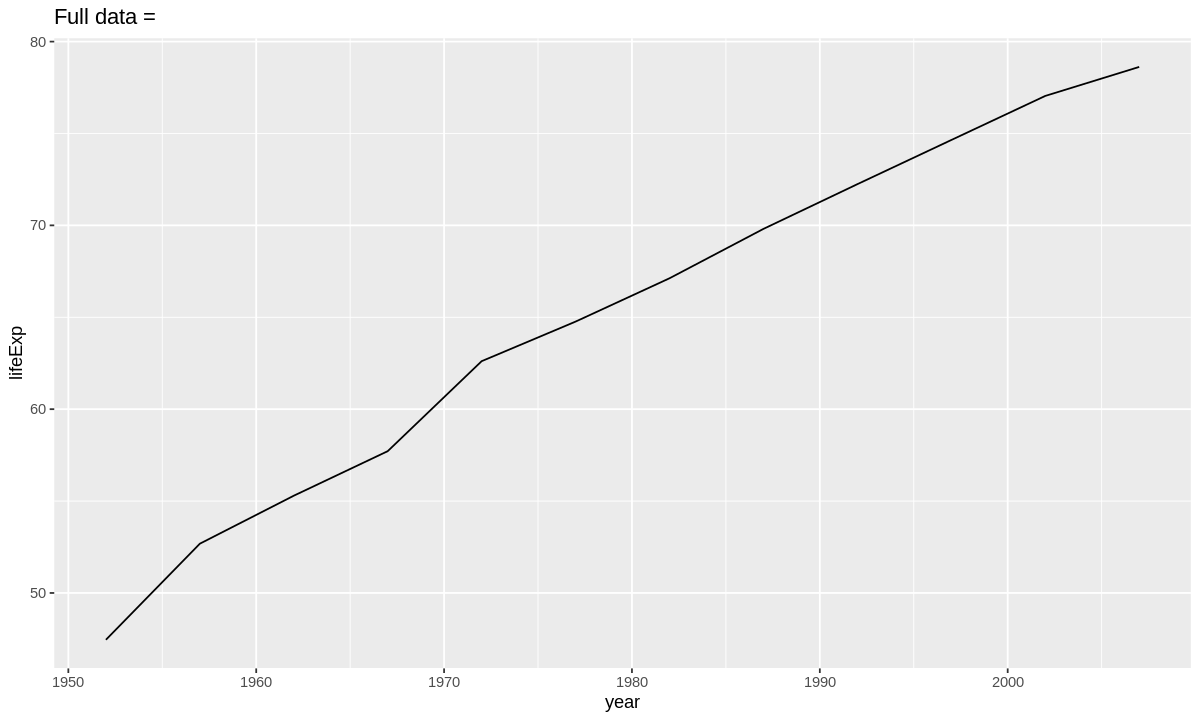

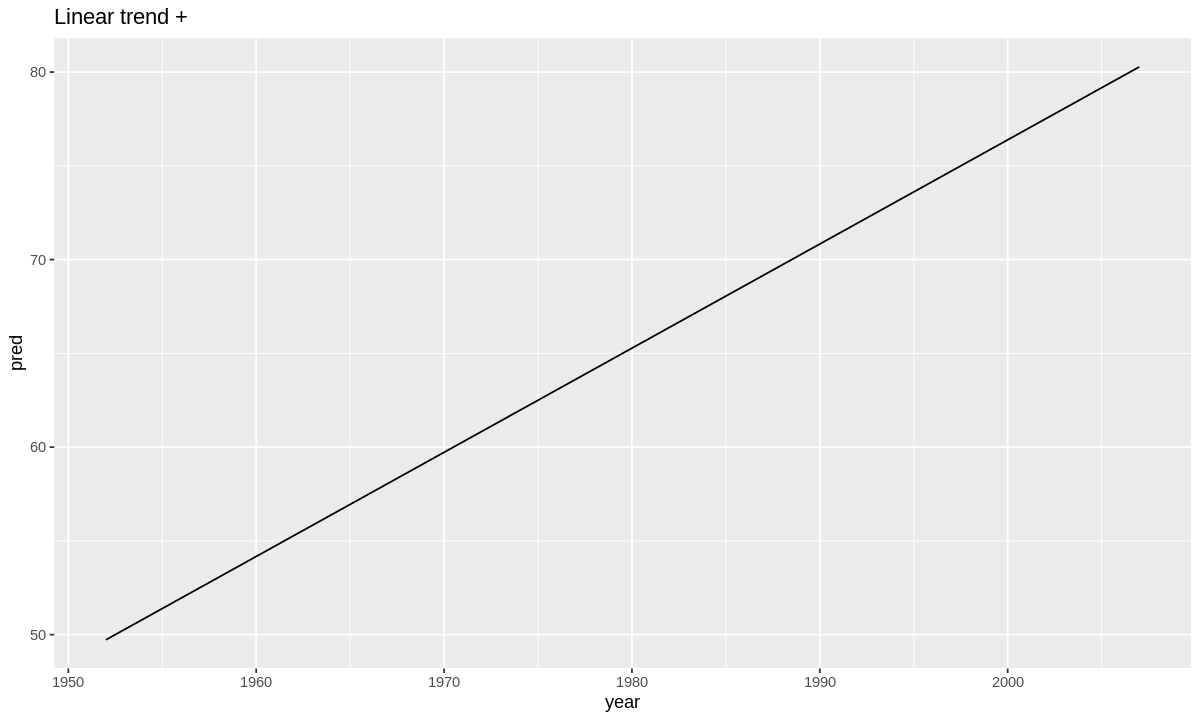

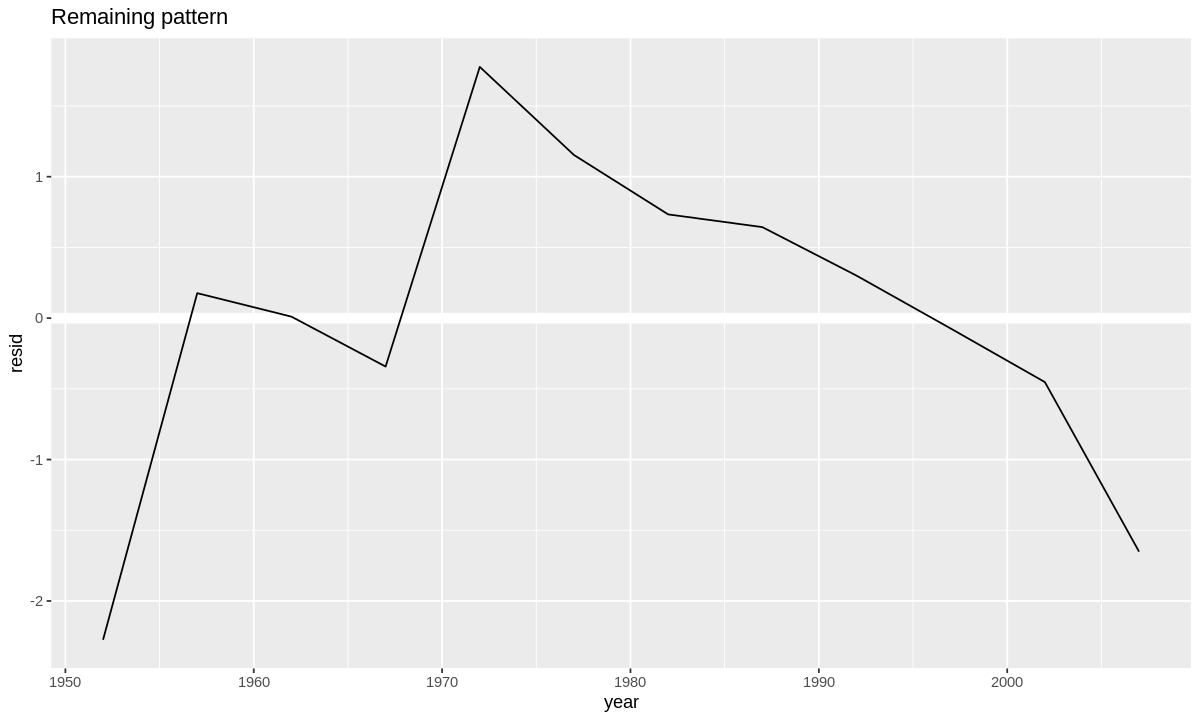

In [71]:
kr %>% 
  ggplot(aes(year, lifeExp)) + 
  geom_line() + 
  ggtitle("Full data = ")

kr_mod <- lm(lifeExp ~ year, data = kr)
kr %>% 
  add_predictions(kr_mod) %>%
  ggplot(aes(year, pred)) + 
  geom_line() + 
  ggtitle("Linear trend + ")

kr %>% 
  add_residuals(kr_mod) %>% 
  ggplot(aes(year, resid)) + 
  geom_hline(yintercept = 0, colour = "white", size = 3) + 
  geom_line() + 
  ggtitle("Remaining pattern")

In [72]:
by_country <- gapminder %>% 
  group_by(country, continent) %>% 
  nest()

In [73]:
country_model <- function(df) {
  lm(lifeExp ~ year, data = df)
}

In [74]:
models <- map(by_country$data, country_model)

In [75]:
by_country <- by_country %>% 
  mutate(model = map(data, country_model))

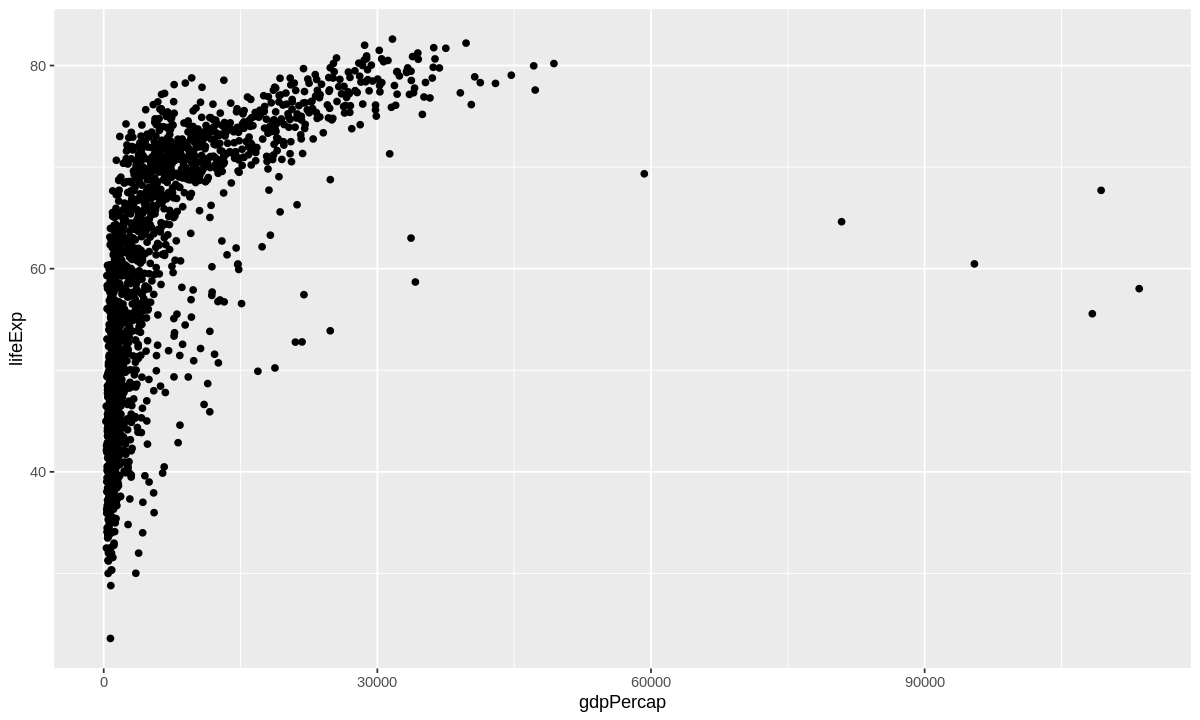

In [76]:
ggplot(data=gapminder) +
   geom_point(aes(gdpPercap, lifeExp))

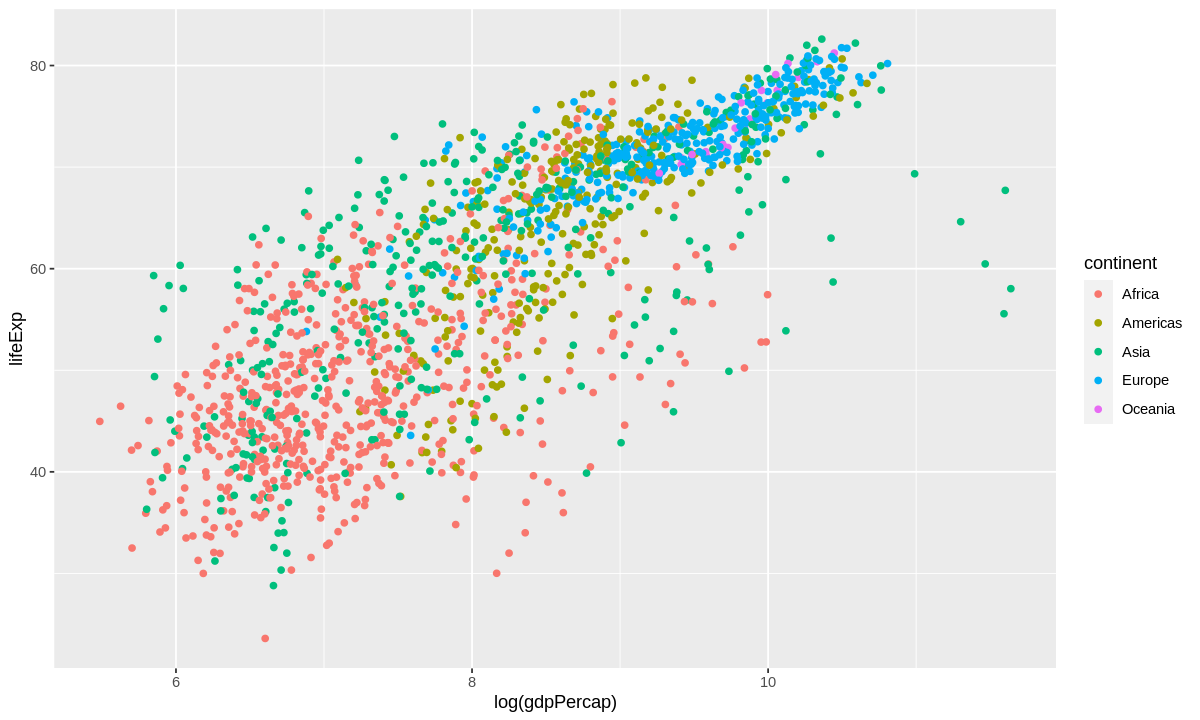

In [77]:
ggplot(data=gapminder) +
   geom_point(aes(log(gdpPercap), lifeExp, color=continent))

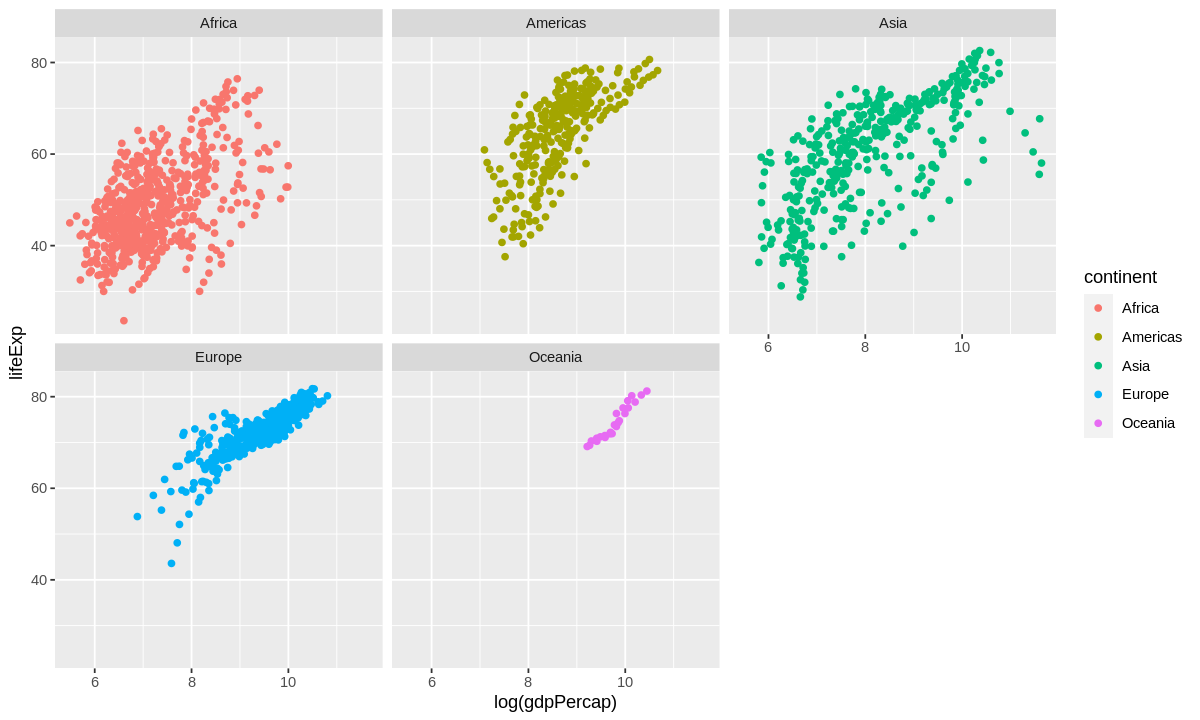

In [78]:
ggplot(data=gapminder) +
   geom_point(aes(log(gdpPercap), lifeExp, color=continent)) +
   facet_wrap(~continent, nrow=2)